In [2]:
!pip install plotly

In [7]:
!pip install -U kaleido

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import seaborn as sns
import re
from utils import resize
import plotly.express as px

pd.set_option('display.max_colwidth', 1000)

In [2]:
sep = '|'
df_orig = pd.read_csv("..\\raw_csv\\2022_Annual_Survey_Aggregate_Data_for_2022_Annual_Survey_20220905222712-SurveyExport.csv", sep = sep)
is_military = df_orig['Are you, or were you ever, an active member of the military or member of the National Guard or Reserve?'] == 'Yes'
df_orig_military = df_orig[is_military].copy().reset_index()
df_orig_civ = df_orig[~is_military].copy().reset_index()
df_orig_military['All'] = 'All'
df_orig['is_military'] = is_military

In [ ]:
df_orig.loc[~df_orig['Gender (Optional):'].isna(), ['What is your gender?', 'Gender (Optional):']]

In [5]:
school_labels = ['educa', 'school', 'college', 'student', 'study', 'degree']
job_labels = ['job', 'work', 'career', 'employ', 'salary', 'trade']
finance_labels = ['credit', 'financ', 'pay', 'salary', 'income', 'money', 'budget','savings',
                 'disability', 'claim']
hosing_labels = ['home', 'hous']
health_labels = ['condition', 'disease', 'insurance','sleep', 'covid', 'exercise', 
                 'sports','health', 'medical', 'weight', 'therapy', 'gym', 'smoke',
                 'drink', 'claim']
service_labels = ['service', 'tour', 'war', 'discharge', 'military', 'deploy']
persion_labels = ['relig', 'therapy', 'spirit', 'practice', 'smoke',
                  'drink', 'transport', 'race', 'gender', 'read']
community_labels = ['community']
hope_scale_labels = ['adult hope scale', 'hope scale score']
topics = ['Education', 'Employment', 'Financial', 'Home', 'Health', 
                              'Service', 'Community', 'Personal', 'Hope Scale']
topic_labels = [school_labels, job_labels, finance_labels, hosing_labels, health_labels,
                             service_labels, community_labels, persion_labels, hope_scale_labels]
labels_dict = {}
questions_used = set()
for labelName, labels in zip(topics, topic_labels):
    
    labels_dict[labelName] = {col for col in df_orig if any(x in col.lower() for x in labels)}
    questions_used = questions_used.union(labels_dict[labelName])
labels_dict['Other'] = {x for x in df_orig  if not x in questions_used}

In [68]:
ordered_list = {}
for x in labels_dict:
    ordered_list[x] = []
    for col in df_orig:
        if col in labels_dict[x]:
            ordered_list[x].append(col)

In [106]:
cnt = 1
for col in df_orig:
    print('   ' + str(cnt) + '.', re.sub('[^a-z^0-9^?^.^:^;^,^(^)^/^-^"^\'^ ]', ' ', col, flags = re.IGNORECASE).strip())
    print()
    cnt+=1

   1. Response ID

   2. Time Started

   3. Date Submitted

   4. Status

   5. Legacy Comments

   6. Comments

   7. Language

   8. Referer

   9. SessionID

   10. User Agent

   11. Tags

   12. What is your zip code?

   13. Are you, or were you ever, an active member of the military or member of the National Guard or Reserve?

   14. Have you ever received information or assistance from  veteran serving organizations within your community?

   15. What is your gender?

   16. Gender (Optional):

   17. Post 9/11 era (September 11, 2001   Present):Service era (Select all that apply)

   18. Persian Gulf era (August 1991   September 2001):Service era (Select all that apply)

   19. Post Vietnam era (May 1975   July 1991):Service era (Select all that apply)

   20. Vietnam era (August 1964   April 1975):Service era (Select all that apply)

   21. Between Korea and Vietnam era (February 1955   July 1964):Service era (Select all that apply)

   22. Korean War era (June 1950   Januar

In [37]:
color_map = {'Male': '#636EFA',
 'Other': '#FF6692',
 'Female': '#EF553B'}
gender_info = df_orig[['What is your gender?', 'is_military']].value_counts().reset_index().rename(
    columns = {'What is your gender?' : 'Gender', 0 : 'count'})
gender_info = gender_info.sort_values('count')
fig = px.pie(gender_info[gender_info['is_military']], values='count', names='Gender', 
             color = 'Gender',
             title='Military Respondents - Gender Demographics', 
             color_discrete_map = color_map)
#fig.write_image("plots_2022/Demographics/Gender_military.png")
fig.write_html("plots_2022/HTML/Military_Gender_Demographics.html",  include_plotlyjs="cdn", full_html=False)
fig = px.pie(gender_info[~gender_info['is_military']], 
             values='count', 
             names='Gender', 
             color = 'Gender',
             title='Non-Military Respondents - Gender Demographics', 
             color_discrete_map = color_map)
# fig.write_image("plots_2022/Demographics/Gender_non_military.png")
fig.write_html("plots_2022/HTML/NonMilitary_Gender_Demographics.html",  include_plotlyjs="cdn", full_html=False)

In [48]:
color_map = {'White American': '#636EFA',
 'American Indian or Alaska Native': '#B6E880',
 'Black or African American': '#00CC96',
 'Hispanic or Latino': '#AB63FA',
 'Native Hawaiian or Other Pacific Islander': '#FFA15A',
 'Asian American': '#19D3F3',
 'Prefer not to answer': '#FF6692',
 'Other/ Multi-racial': '#EF553B'}
race_info = df_orig[['Race:Â\xa0', 'is_military']].value_counts().reset_index().rename(columns = 
                                                                        {'Race:Â\xa0' : 'Race', 0 : 'count'})
race_info = race_info.sort_values('count')
fig = px.pie(race_info[race_info['is_military']], values='count', names='Race', 
             color = 'Race',
             title='Military Respondents - Race Demographics', color_discrete_map = color_map)
# fig.write_image("plots_2022/Demographics/Race_military.png")
fig. update_layout(showlegend=False)
fig.write_html("plots_2022/HTML/Military_Race_Demographics.html",  include_plotlyjs="cdn", full_html=False)
fig = px.pie(race_info[~race_info['is_military']], 
             values='count', 
             names='Race', 
             color = 'Race',
             title='Non-Military Respondents - Race Demographics',
             color_discrete_map = color_map)
# fig.write_image("plots_2022/Demographics/Race_non_military.png")

fig.write_html("plots_2022/HTML/NonMilitary_Race_Demographics.html",  include_plotlyjs="cdn", full_html=False)

In [107]:
for x in ordered_list:
    print(x)
    cnt = 1
    for y in ordered_list[x]:
        print('   ' + str(cnt) + '.', re.sub('[^a-z^0-9^?^.^:^;^,^(^)^/^-^"^\'^ ]', ' ', y, flags = re.IGNORECASE))
        print()
        cnt+=1
    print()
    print()

Education
   1. Education benefits (e.g., Montgomery, Post 9/11, GI Bill)   for my family  or myself:What information or resources are you seeking (Select all that apply)?

   2. Enrollment in school (e.g., an education program/vocational program):What information or resources are you seeking (Select all that apply)?

   3. Support to stay in school (e.g., remain on track to graduate):What information or resources are you seeking (Select all that apply)?

   4. How would you rate your level of satisfaction with the education benefits and programs?: Rate the resources you may have received from VA or a community based program:

   5. Education status: What is the highest degree or level of school you have completed?

   6. Are you currently pursuing any of the following degrees or certifications?

   7. Have helped me enroll in school:To what extent do you disagree or agree with the following statements regarding  veteran serving organizations within your community?

   8. Educational s

In [108]:
for x in ordered_list:
    print(x)

Education
Employment
Financial
Home
Health
Service
Community
Personal
Hope Scale
Other


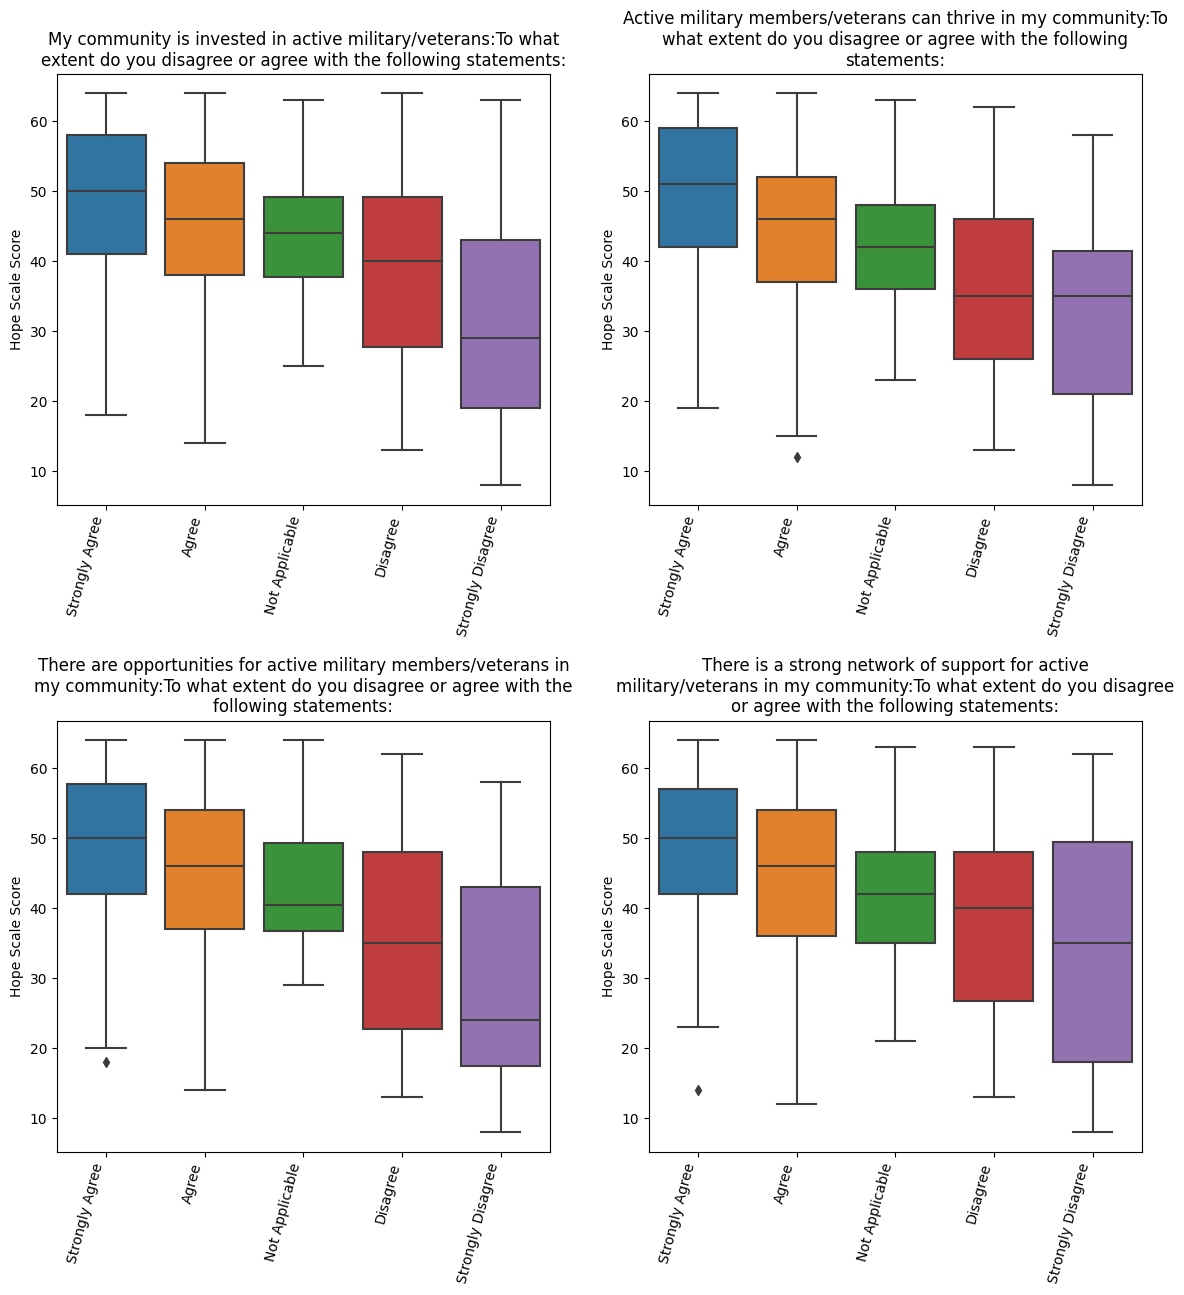

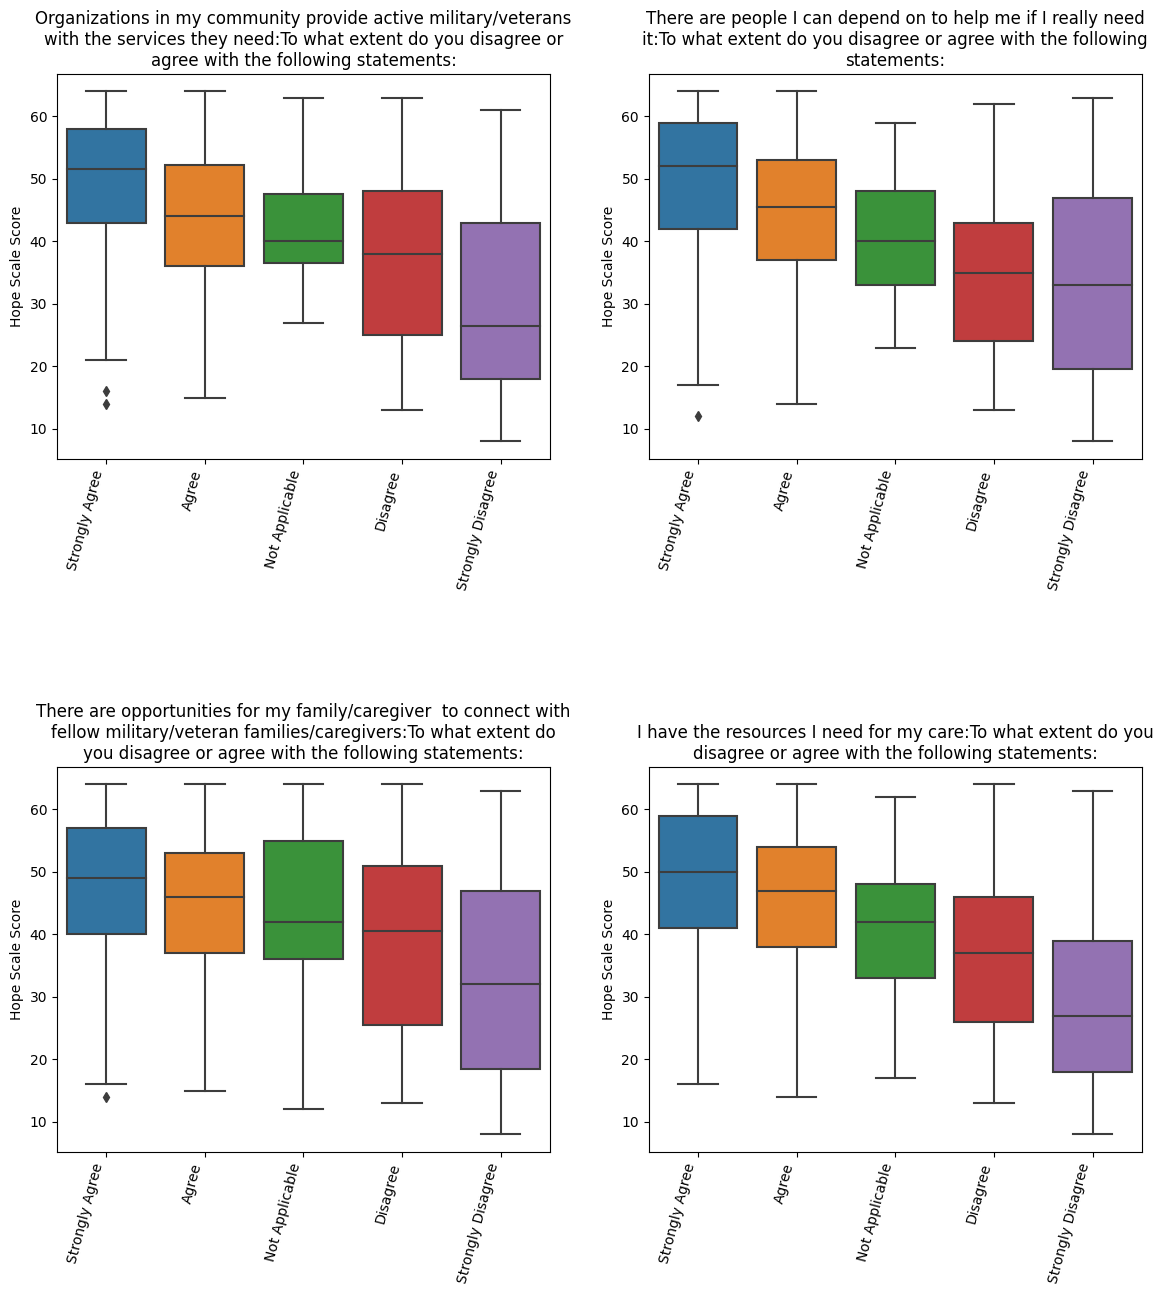

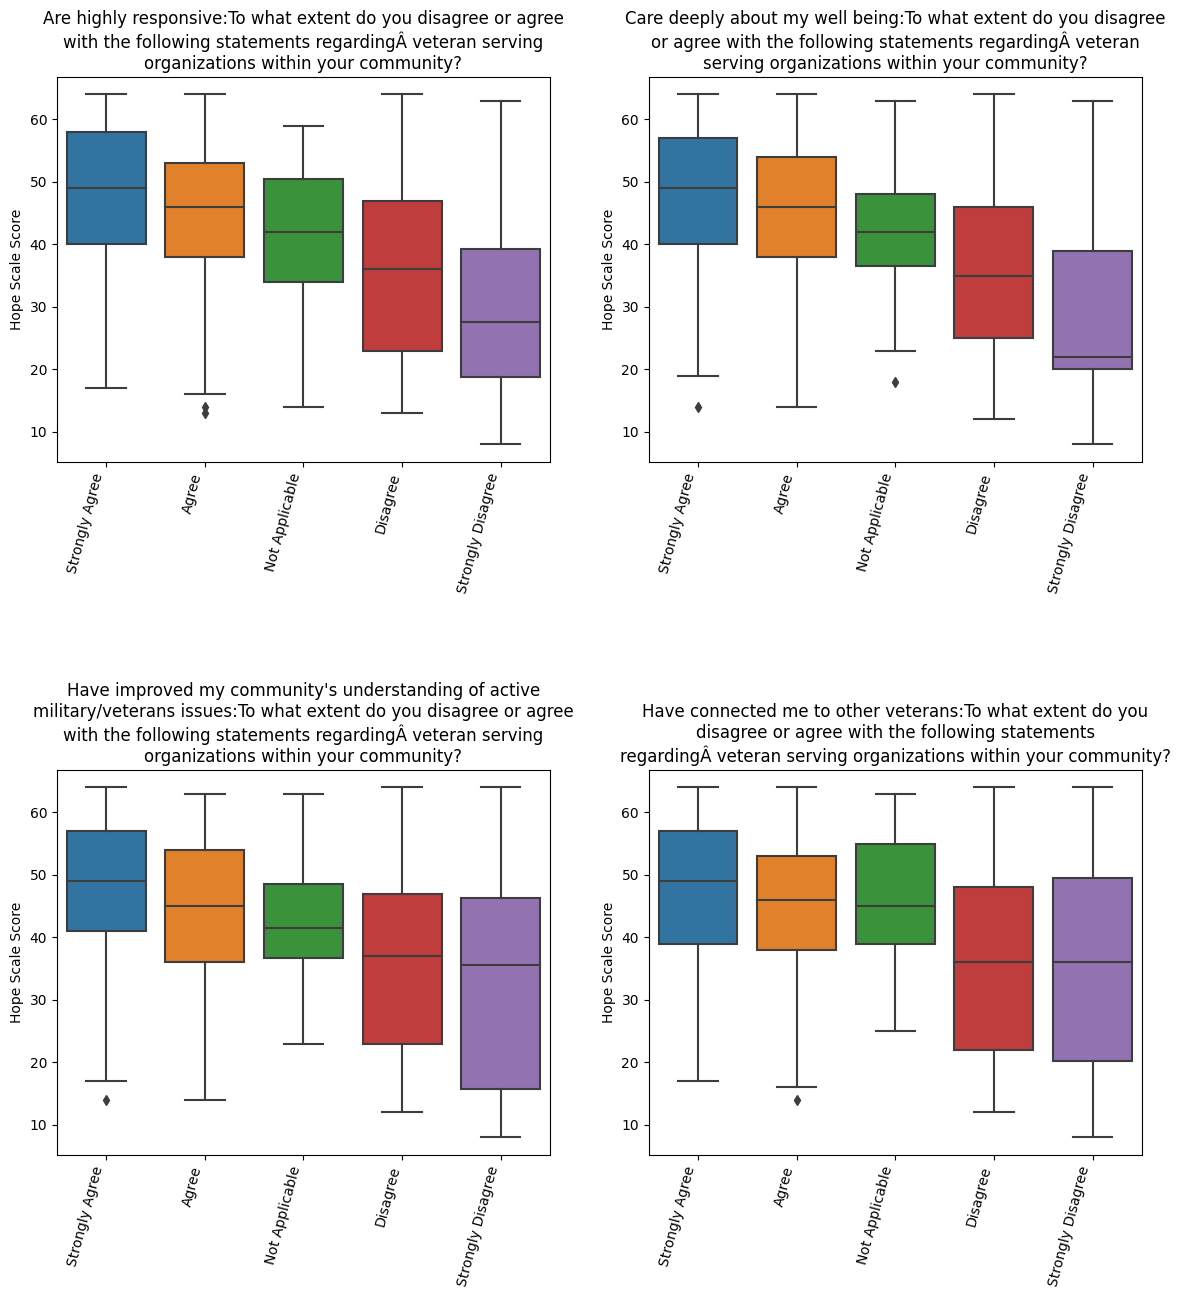

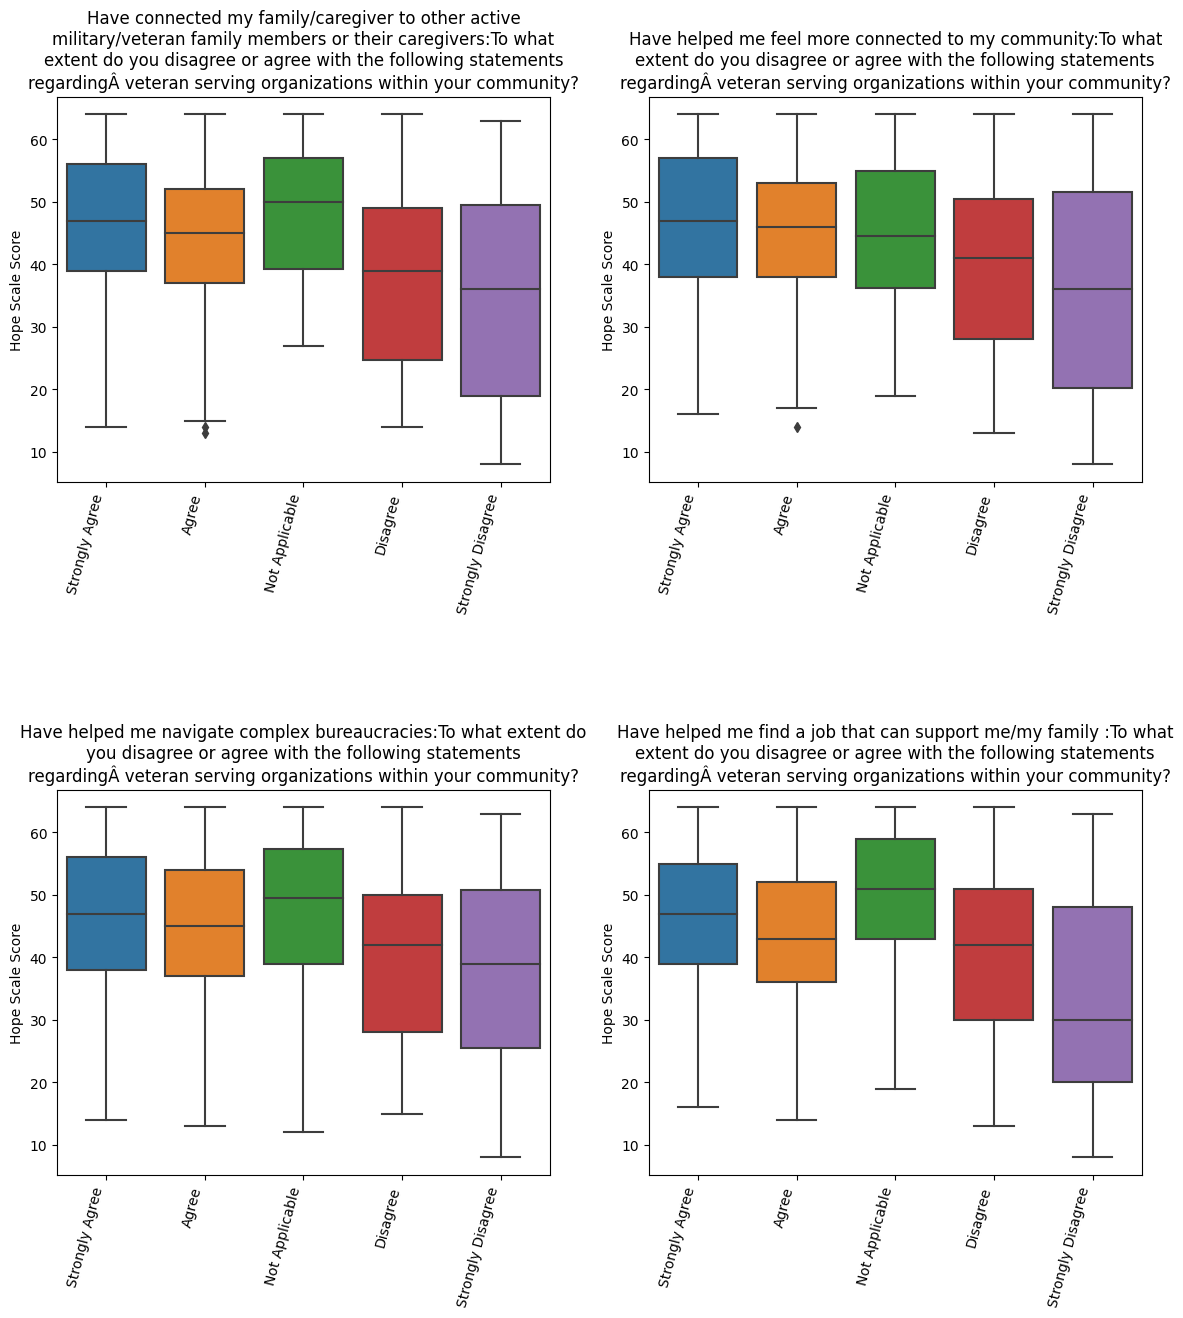

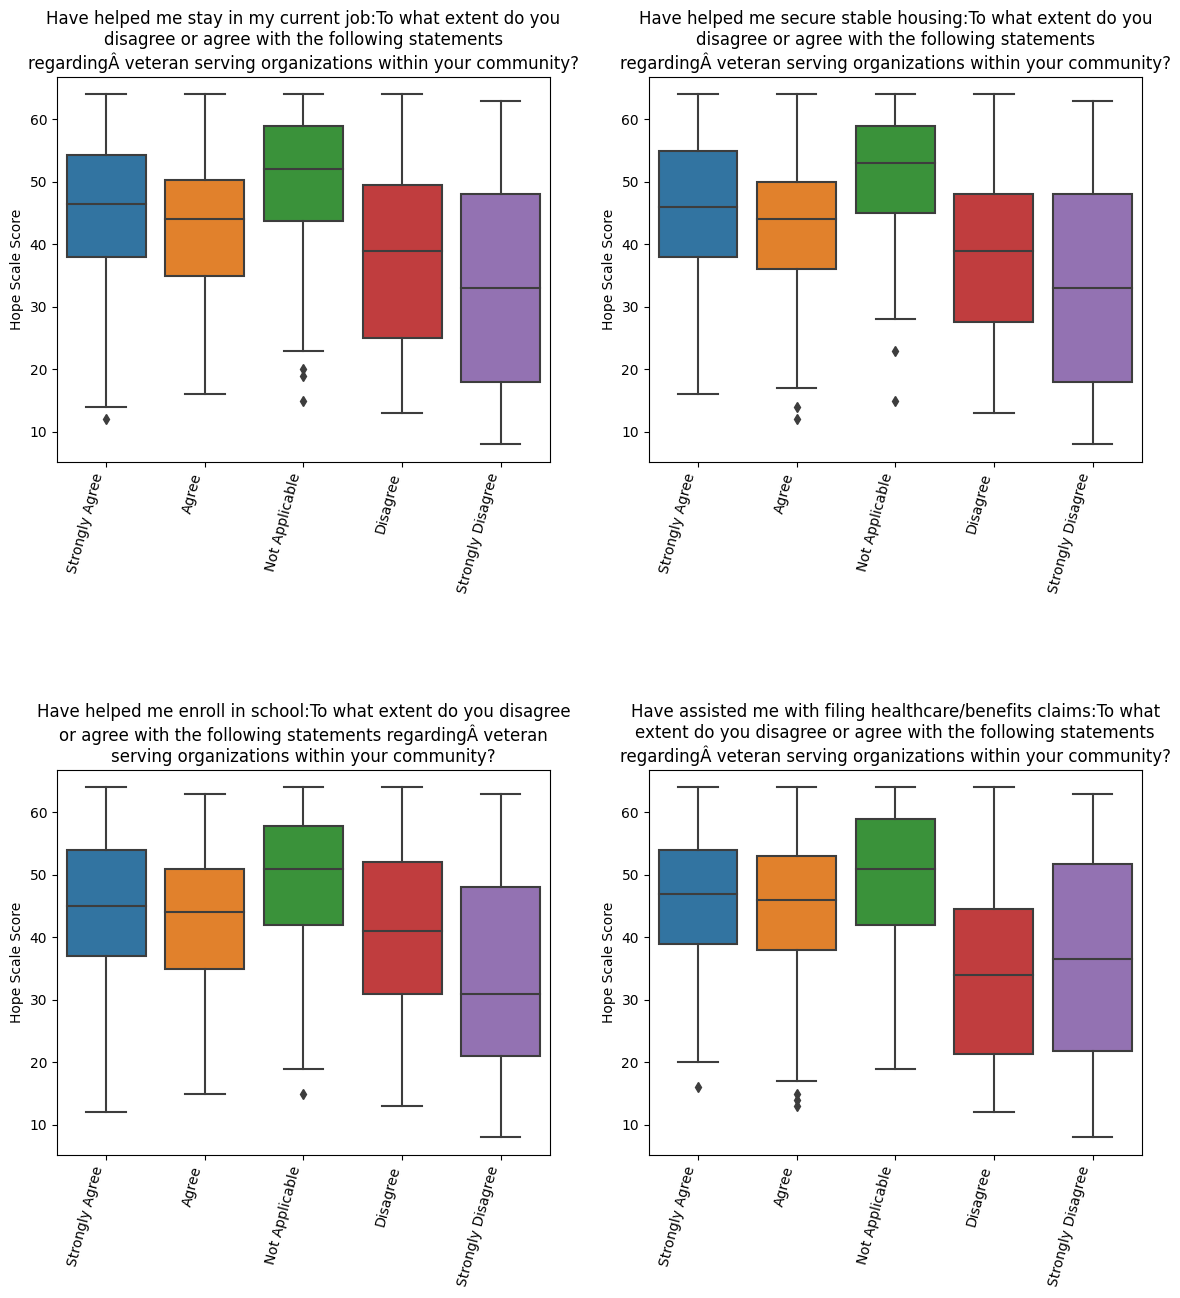

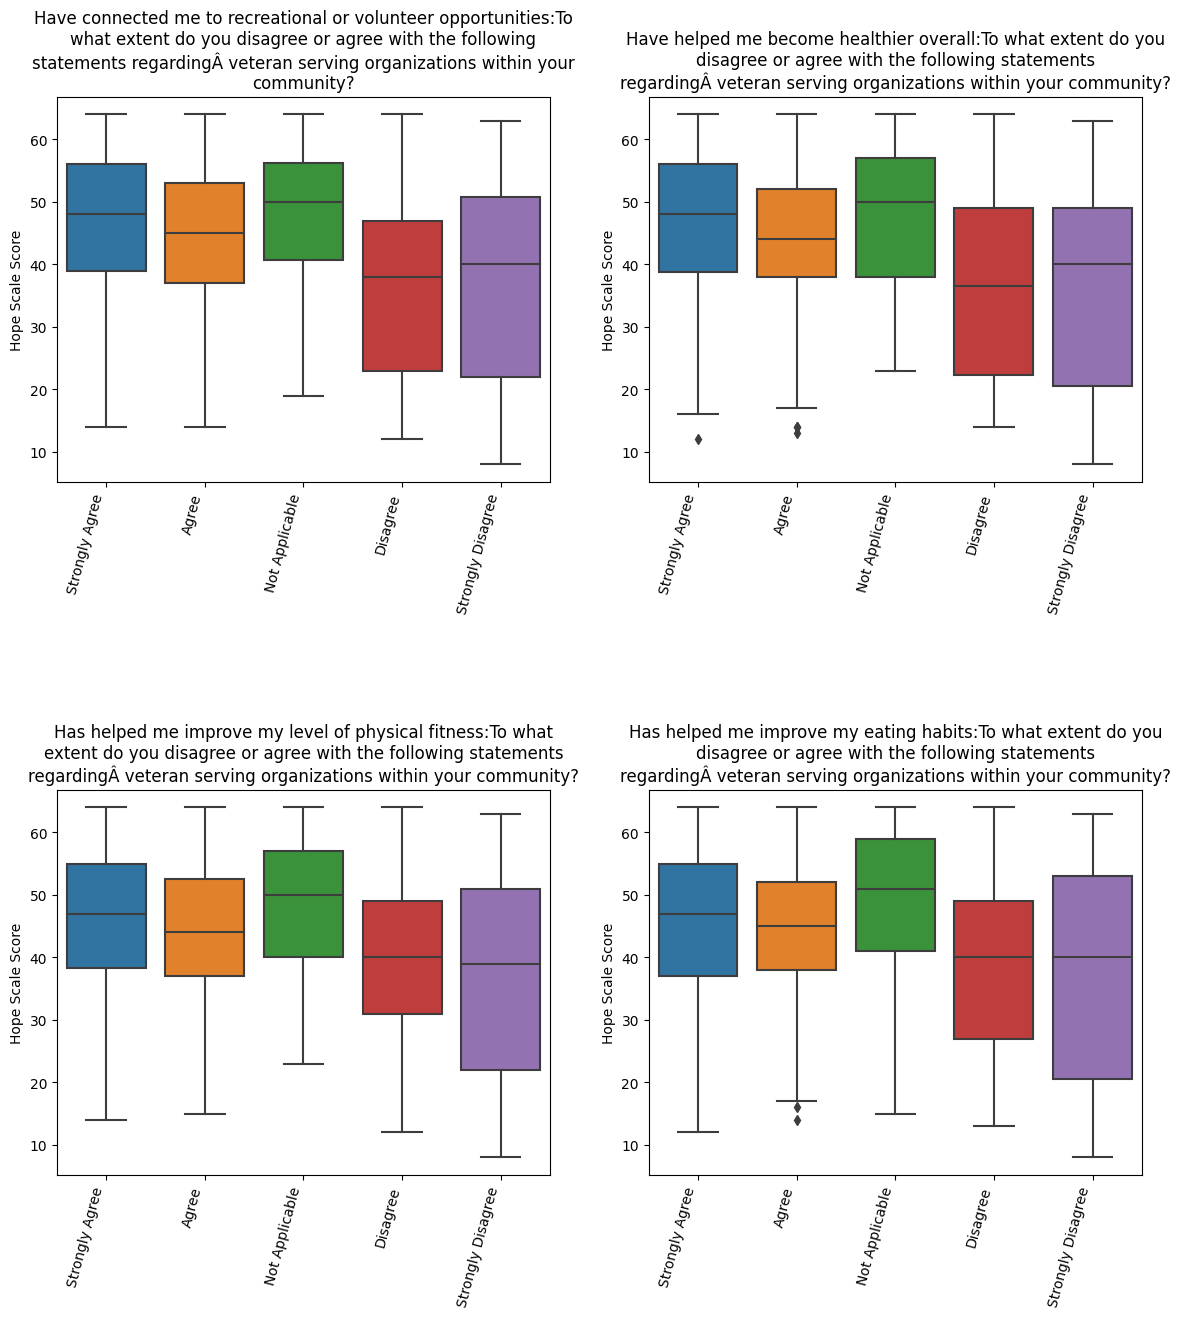

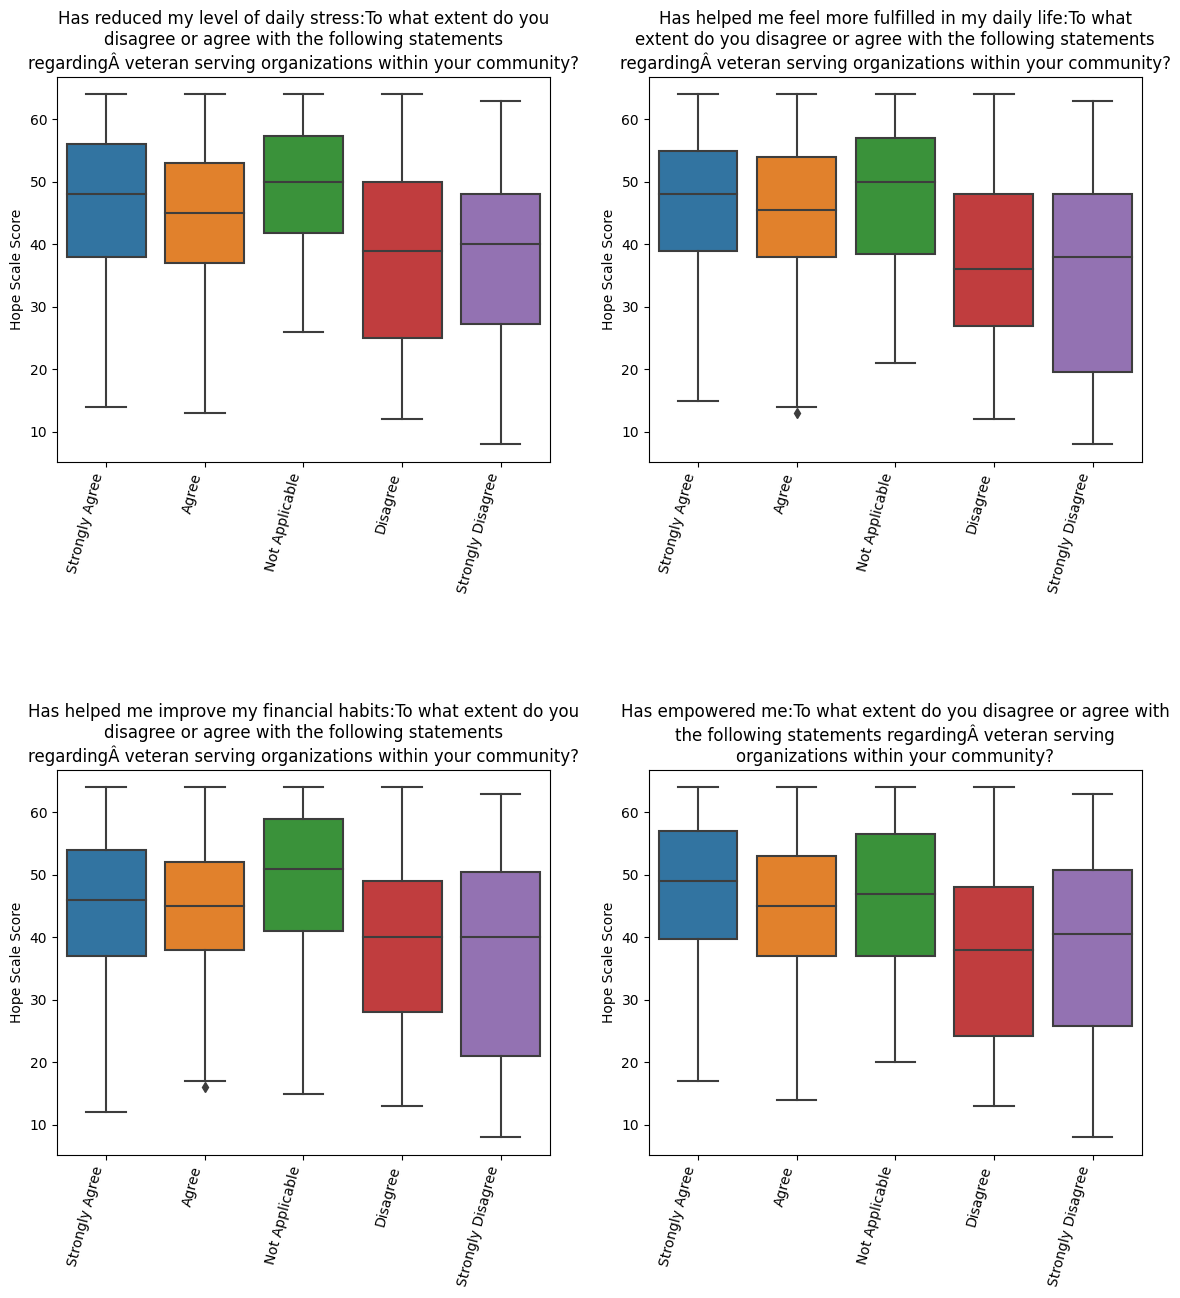

In [7]:
df_orig_military = df_orig_military.sort_values('Hope Scale Score')

fig, axs = plt.subplots(2, 2, gridspec_kw = {'hspace' : .5}, figsize = (14,14))
ax2 = [y for x in axs for y in x]
plt_cnt = 0
ax_cnt = 0
for label in df_orig_military:
    if not 'agree' in label.lower() or not any('agree' in str(x).lower() for x in df_orig_military[label].unique()):
        continue
    nun = df_orig_military[label].nunique()
    if nun <= 2:
        continue
    if ax_cnt == 4:
        ax_cnt = 0
        plt.savefig(f'plots_2022/AgreePlot_{plt_cnt}.png')
        fig, axs = plt.subplots(2, 2,gridspec_kw = {'hspace' : .8}, figsize = (14,14))
        ax2 = [y for x in axs for y in x]
        plt_cnt+=1
    ax = ax2[ax_cnt]
    ax_cnt += 1
    sns.boxplot(data = df_orig_military, x = label, y = 'Hope Scale Score', order = ['Strongly Agree', 
                                                                            'Agree', 
                                                                            'Not Applicable',
                                                                            'Disagree',
                                                                            'Strongly Disagree'], ax = ax)
    ax.set(title = resize(label,65), xlabel = '')
    ax.set_xticks(ax.get_xticks())
    labels = [x for x in ax.get_xticklabels()]
    for x in labels: x.set_text(x.get_text()[:25] + ('...' if len(x.get_text())>=25 else ''))
    ax.set_xticklabels(labels, rotation=75, ha='right')

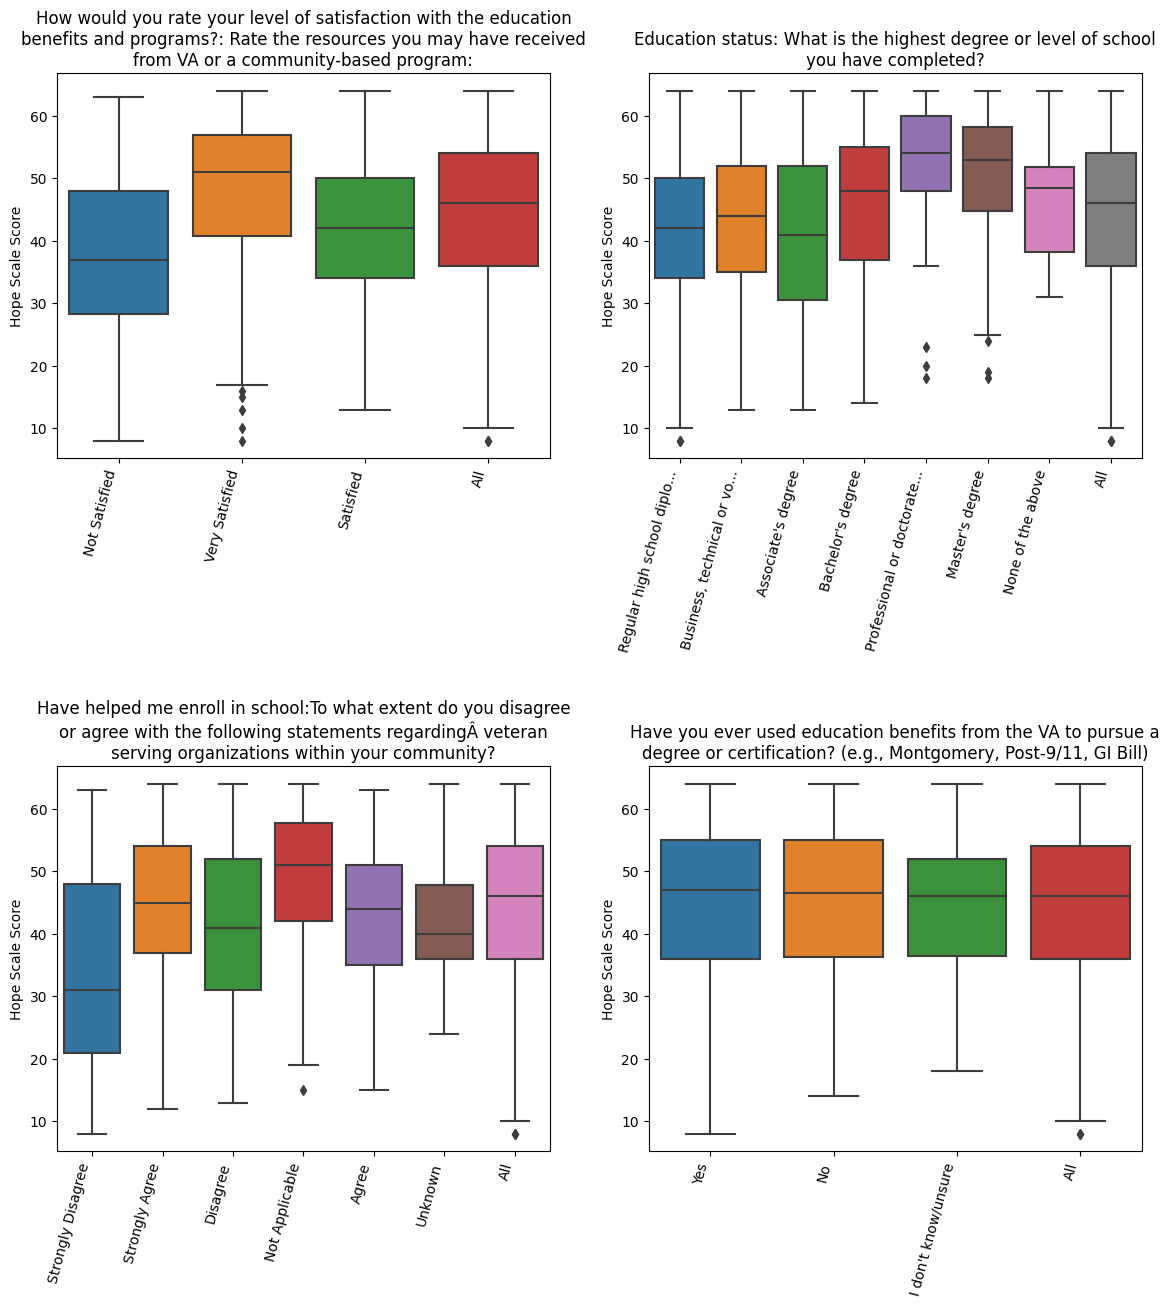

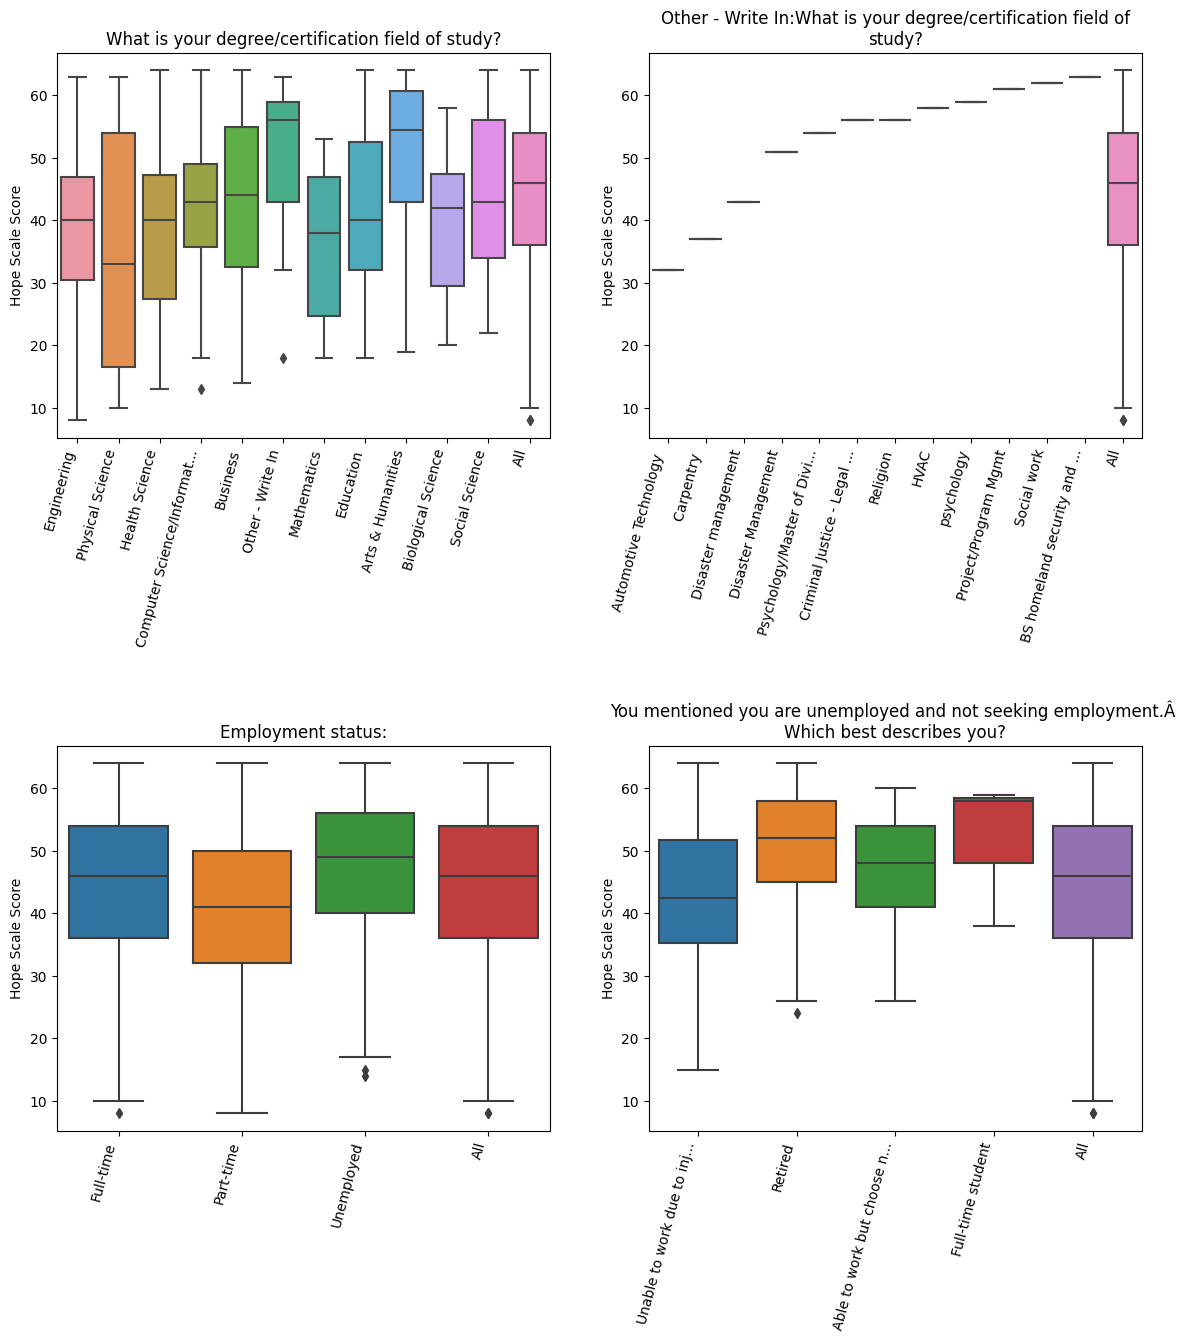

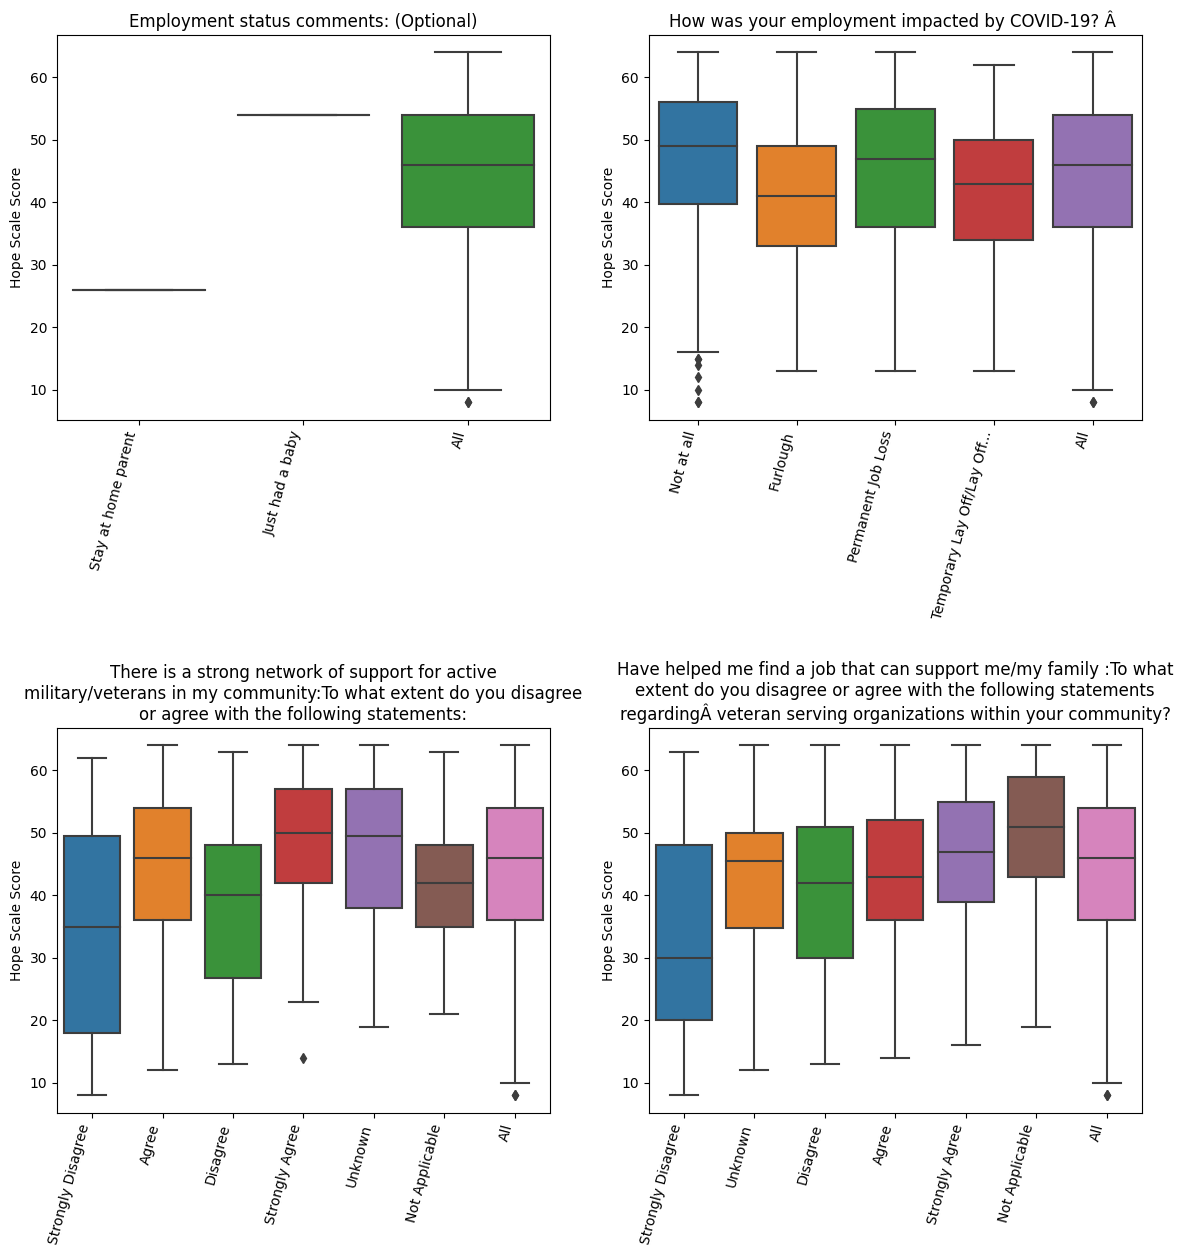

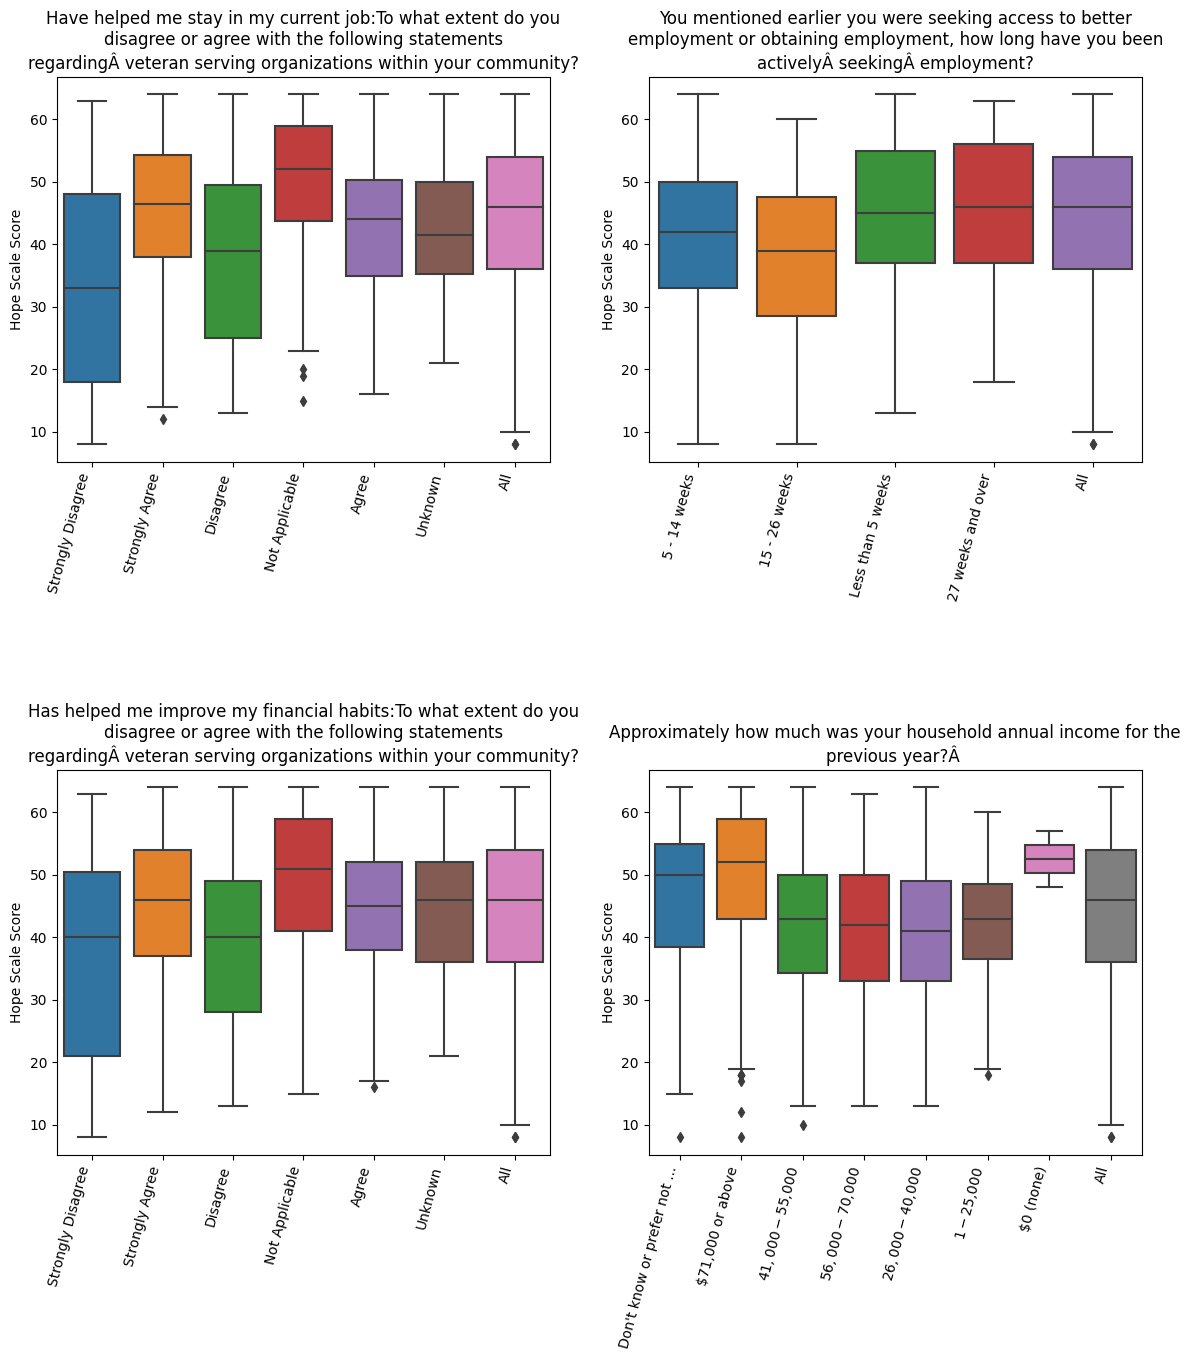

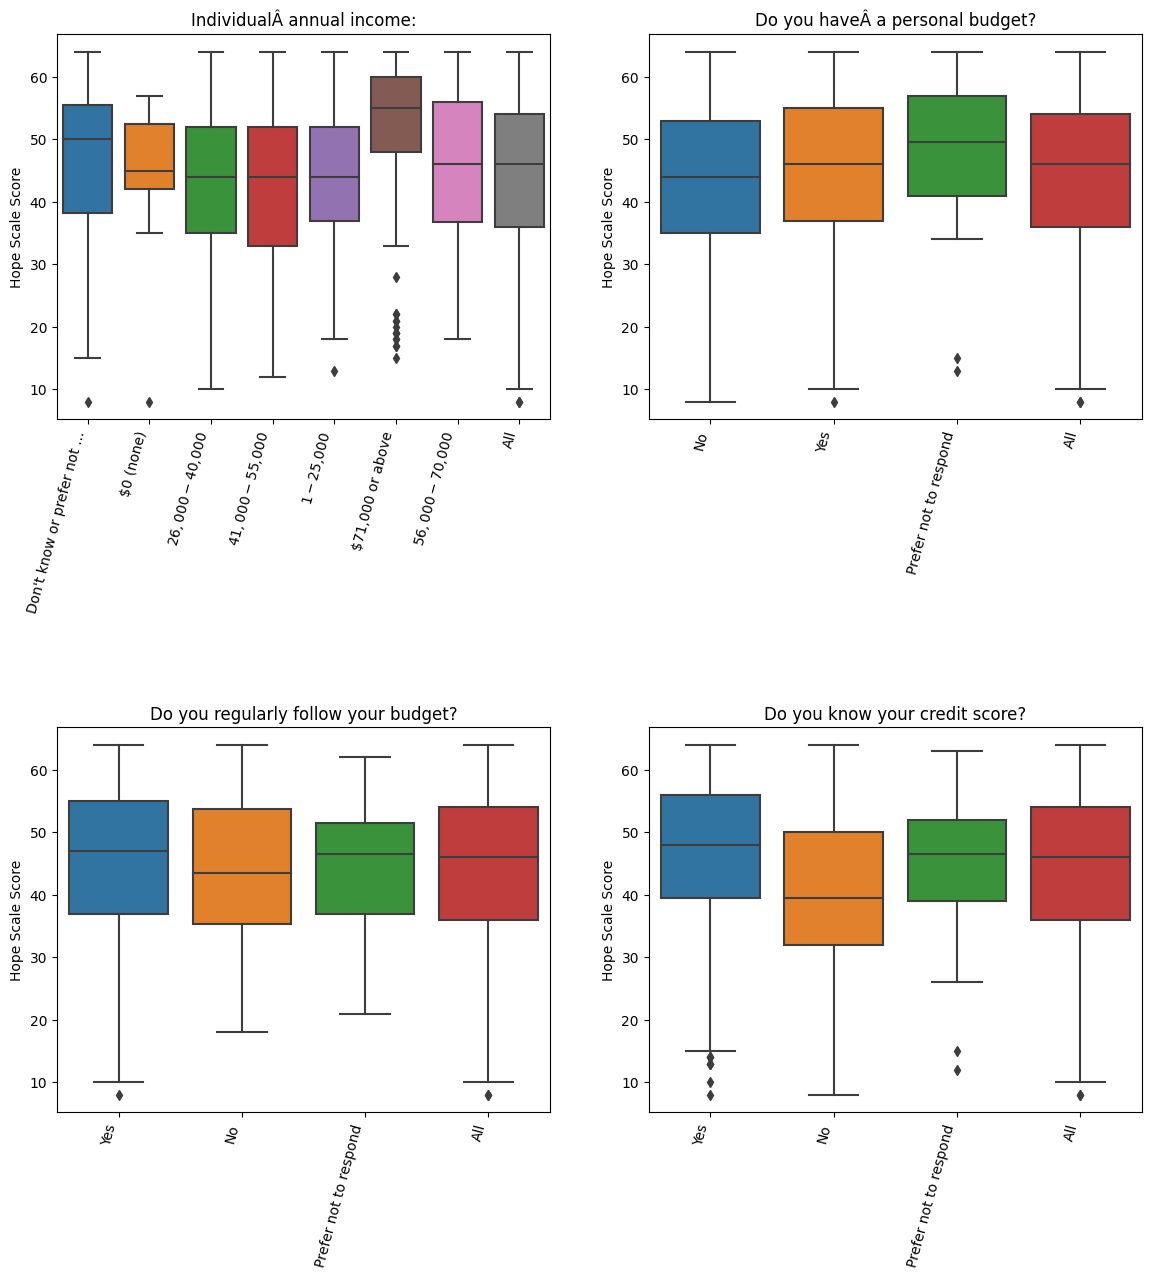

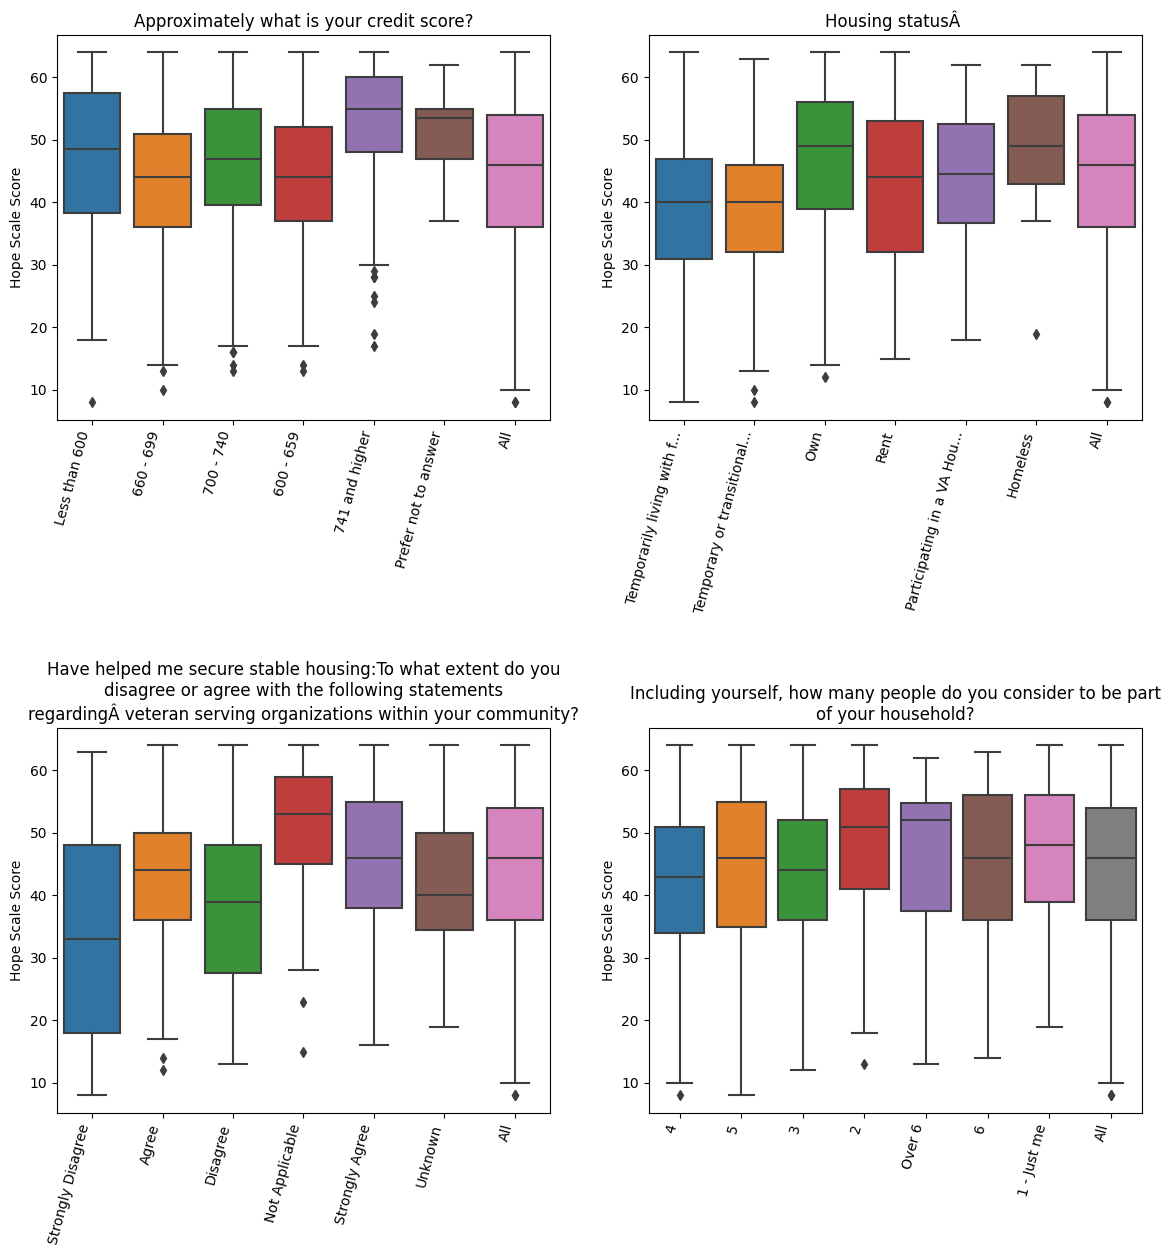

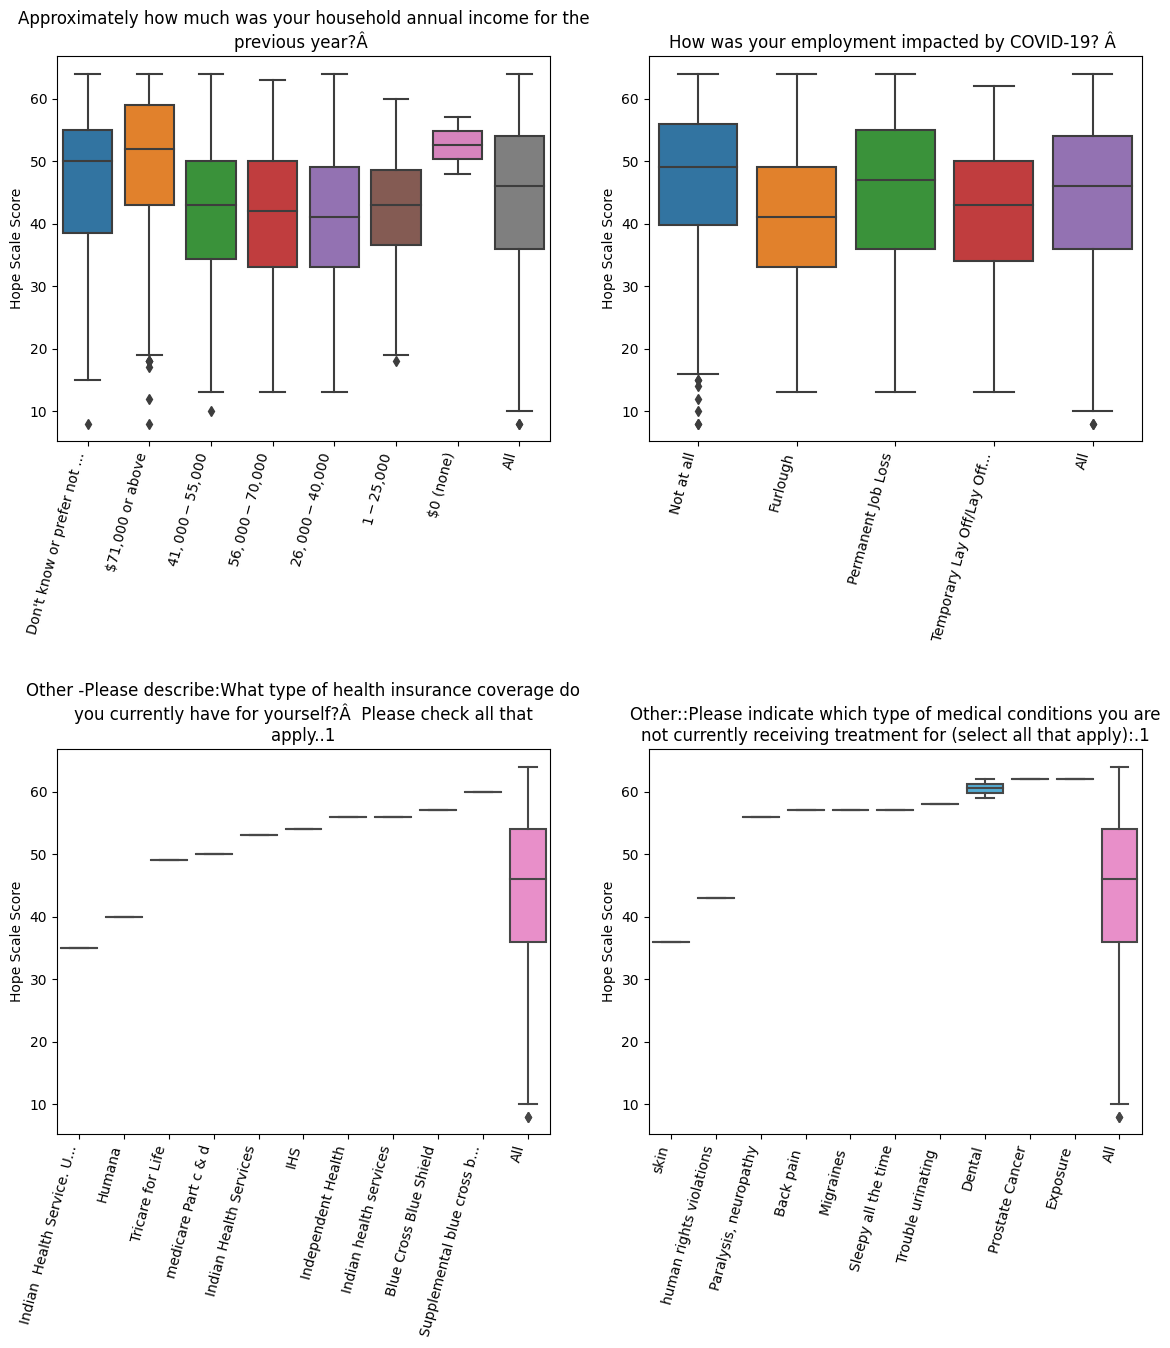

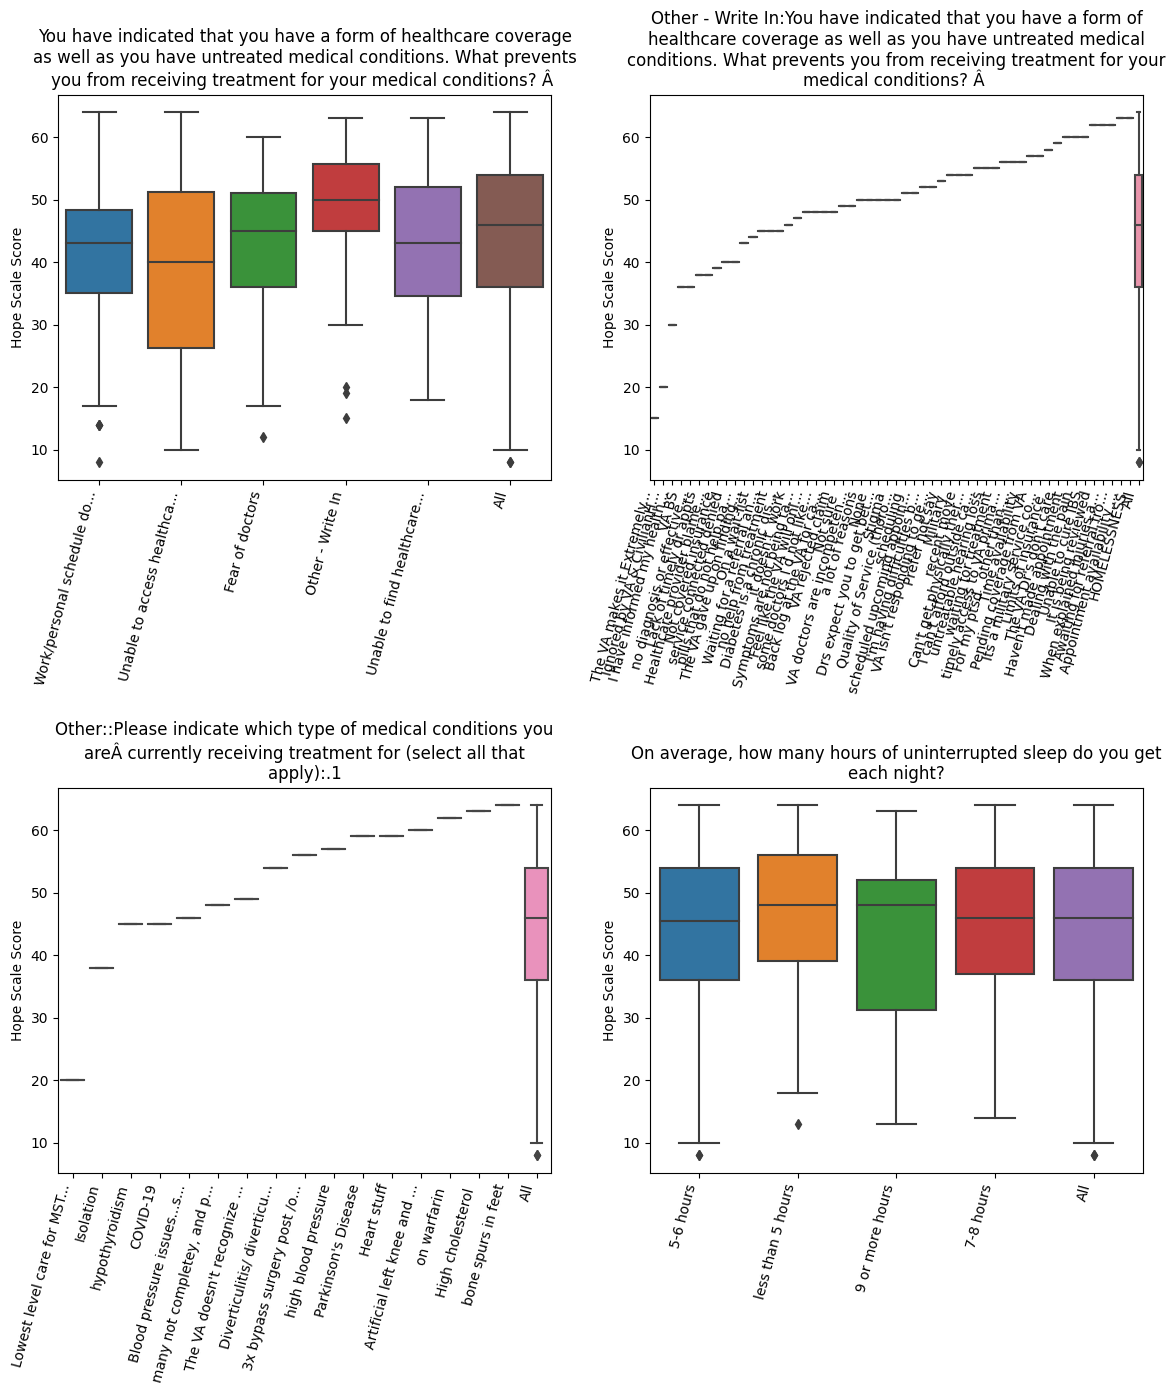

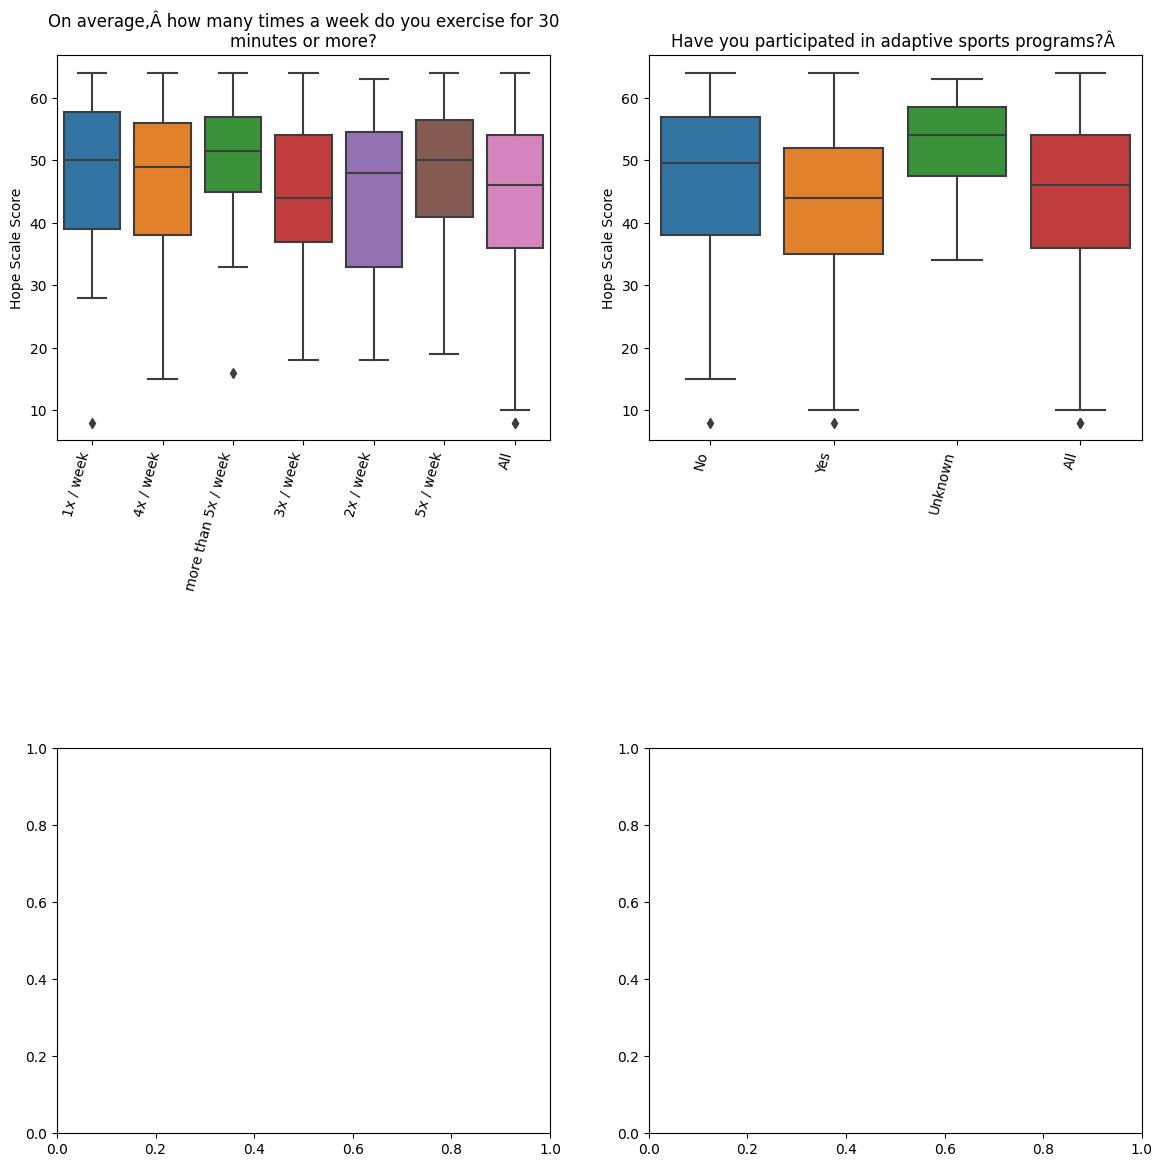

In [14]:
df_orig_military = df_orig_military.sort_values('Hope Scale Score')
fig, axs = plt.subplots(2, 2, gridspec_kw = {'hspace' : .8}, figsize = (14,14))
ax2 = [y for x in axs for y in x]
plt_cnt = 0
ax_cnt = 0
    
for labelType in labels_dict:
    for label in labels_dict[labelType]:
        if not label in df_orig_military:
            continue
        nun = df_orig[label].nunique()
        if nun <= 2:
            continue
        if ax_cnt == 4:
            ax_cnt = 0
            plt.savefig(f'plots_2022/{labelType}_{plt_cnt}.png')
            fig, axs = plt.subplots(2, 2,gridspec_kw = {'hspace' : .8}, figsize = (14,14))
            ax2 = [y for x in axs for y in x]
            plt_cnt+=1
        ax = ax2[ax_cnt]
        ax_cnt += 1
        sns.boxplot(data = pd.concat([df_orig_military,
                                      df_orig_military.drop(columns = label).rename(
                                          columns = {'All' : label})], ignore_index = True), x = label, y = 'Hope Scale Score', ax = ax)
        ax.set(title = resize(label,65), xlabel = '')
        ax.set_xticks(ax.get_xticks())
        labels = [x for x in ax.get_xticklabels()]
        for x in labels: x.set_text(x.get_text()[:25] + ('...' if len(x.get_text())>=25 else ''))
        ax.set_xticklabels(labels, rotation=75, ha='right')

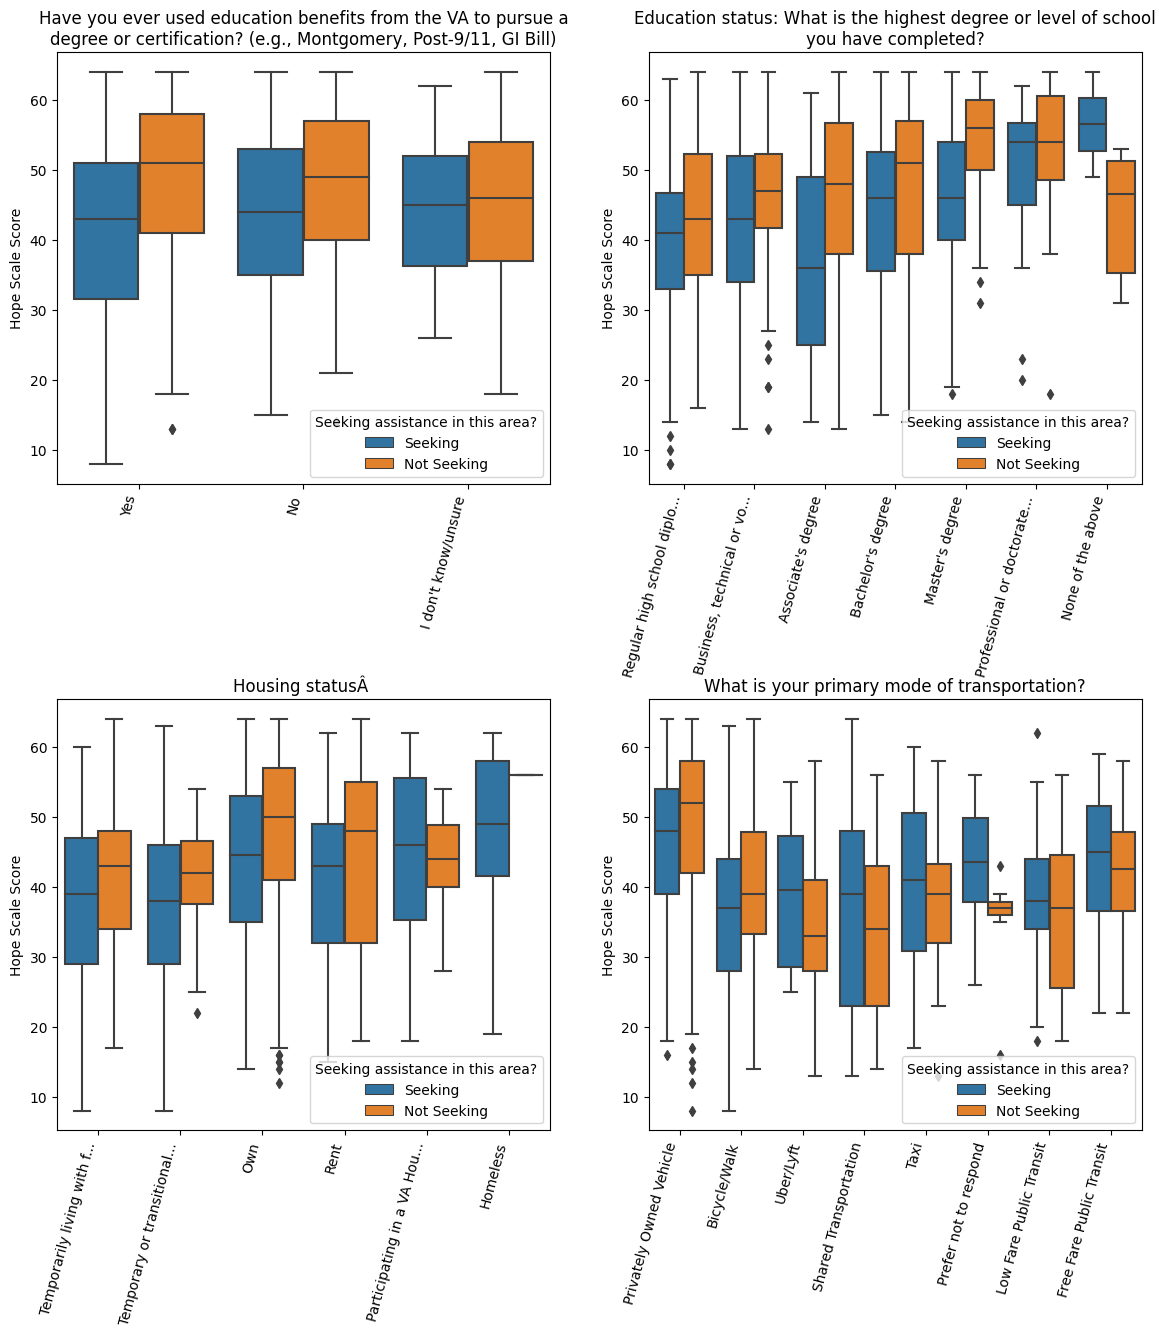

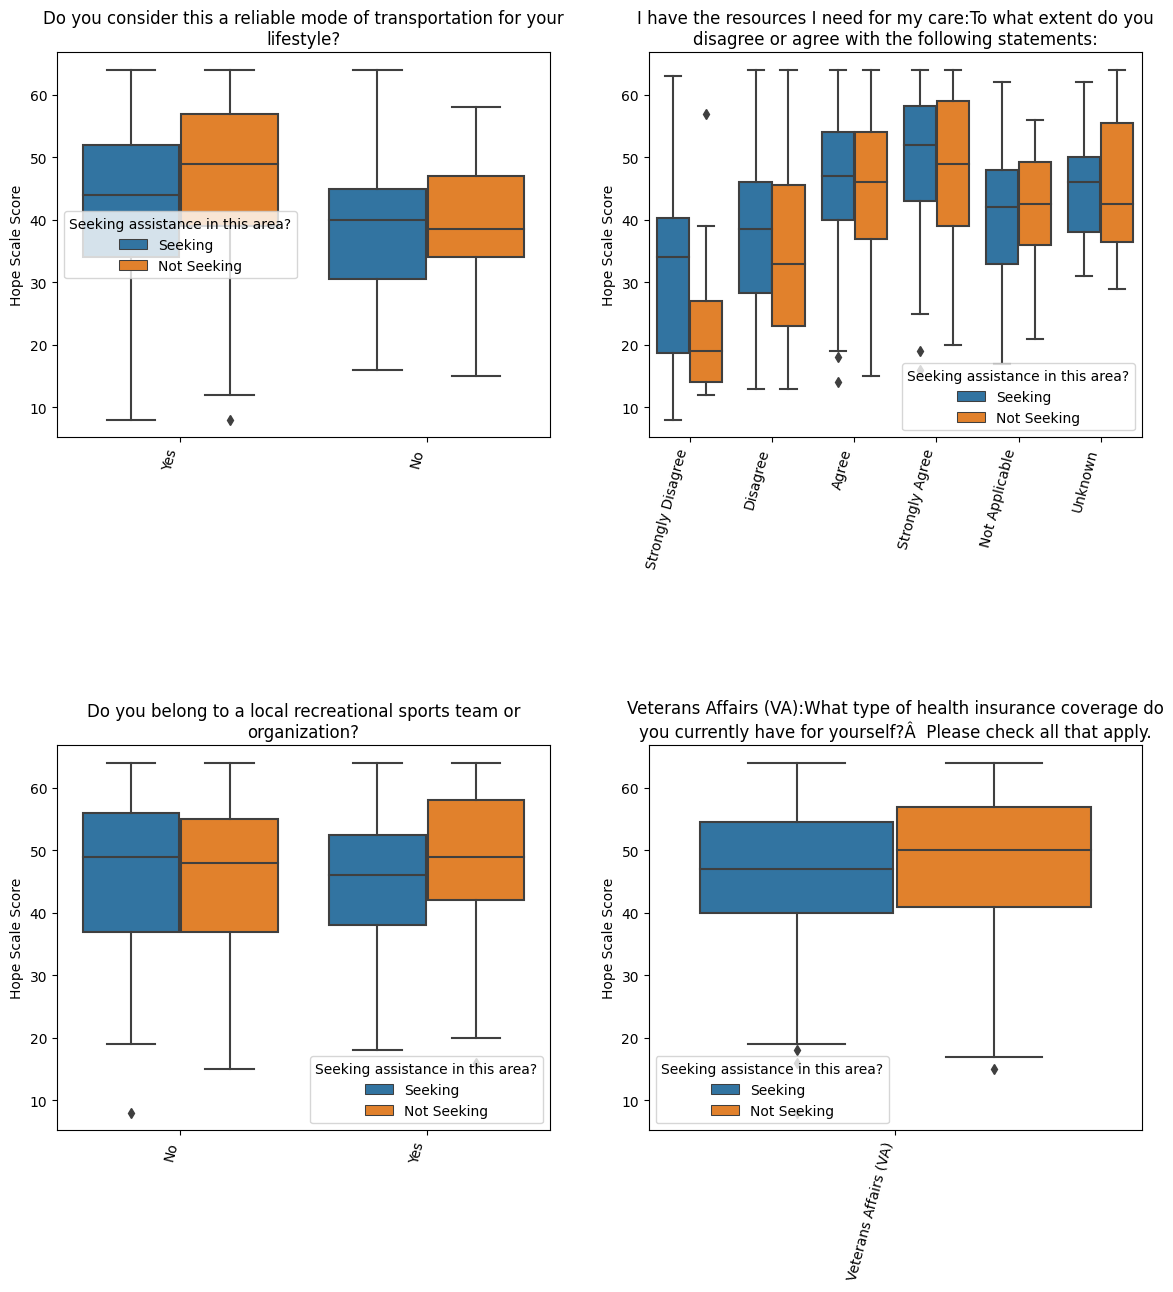

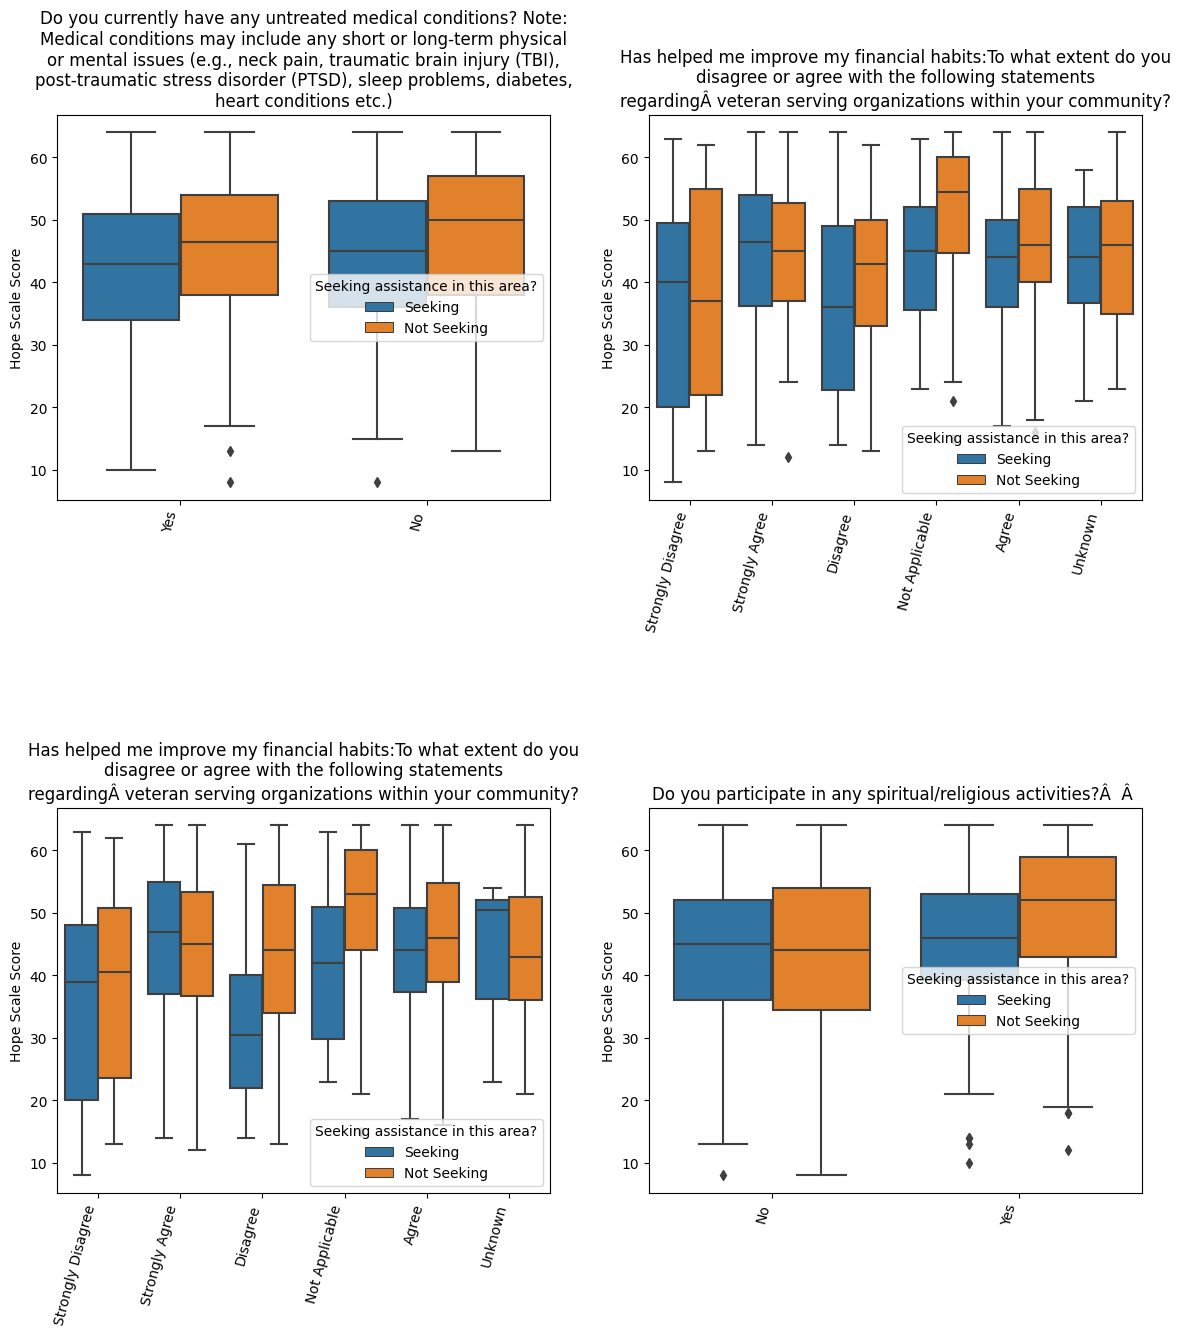

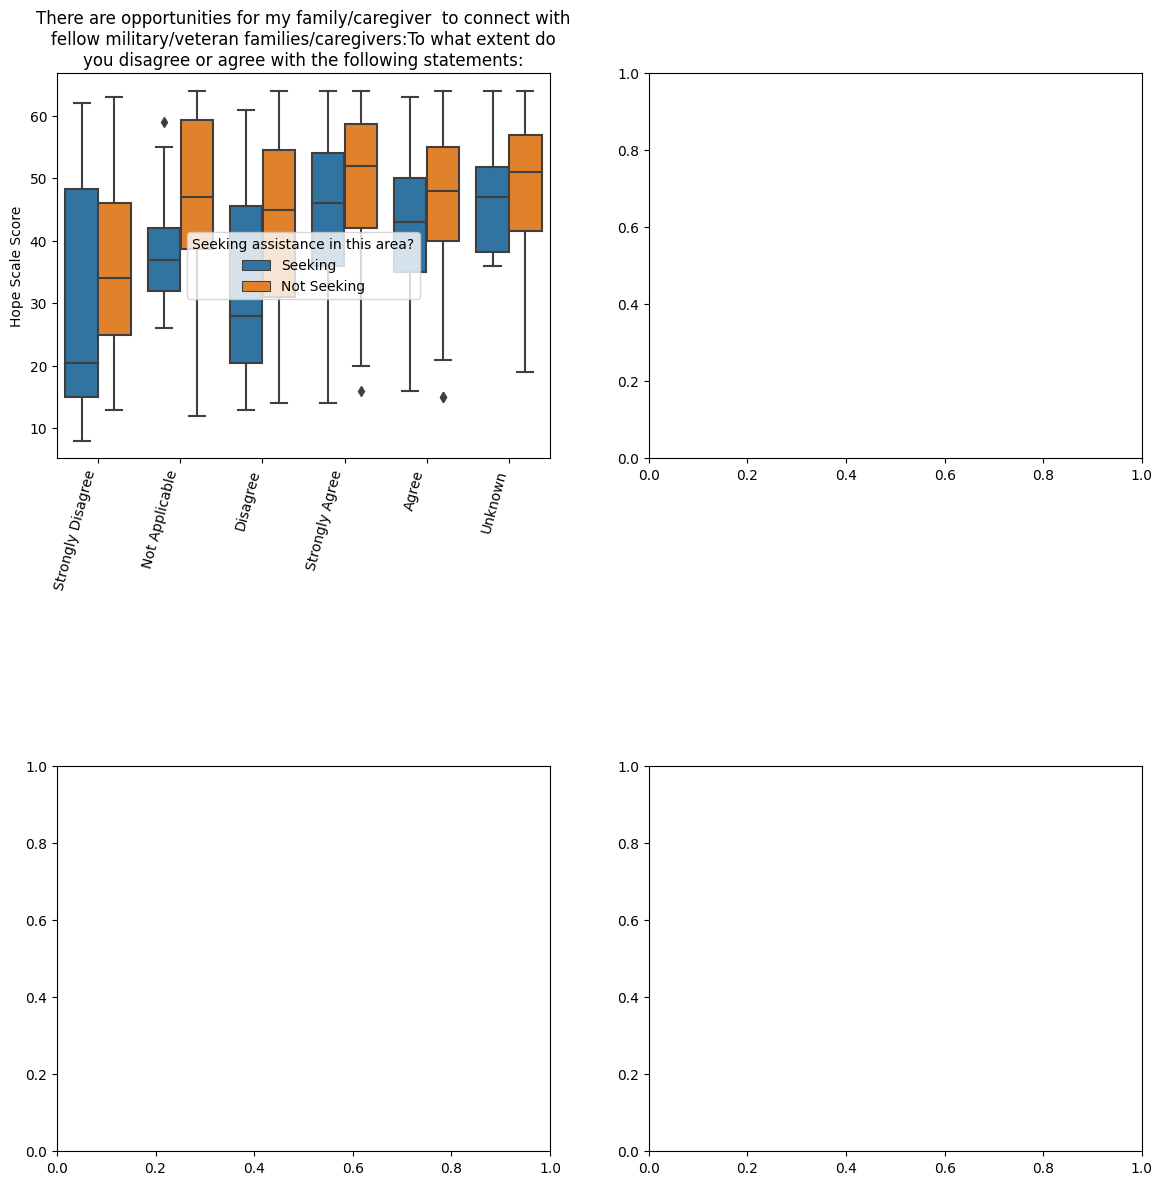

In [39]:
question_pairings = {
    "Education benefits (e.g., Montgomery, Post-9/11, GI Bill) - for my family  or myself:What information or resources are you seeking (Select all that apply)?":
                     ["Have you ever used education benefits from the VA to pursue a degree or certification? (e.g., Montgomery, Post-9/11, GI Bill)",
                      "Education status: What is the highest degree or level of school you have completed?"],
    
    "New housing:What information or resources are you seeking (Select all that apply)?" : "Housing statusÂ\xa0",
    "Better transportation:What information or resources are you seeking (Select all that apply)?" : [
                                    'What is your primary mode of transportation?',
                                'Do you consider this a reliable mode of transportation for your lifestyle?'
    ],
    "Opportunities for me to connect with other military/veteran service members and families/caregivers:What information or resources are you seeking (Select all that apply)?" :
        'I have the resources I need for my care:To what extent do you disagree or agree with the following statements:',
    "Opportunities for recreational or other physical activities:What information or resources are you seeking (Select all that apply)?":
                    'Do you belong to a local recreational sports team or organization?',
    "Health and benefits (VA or non-VA) (e.g., Enrollment):What information or resources are you seeking (Select all that apply)?":
                            'Veterans Affairs (VA):What type of health insurance coverage do you currently have for yourself?Â\xa0 Please check all that apply.',
    "Physical health treatment and/or resources and support (e.g., Better access to scheduled appointments):What information or resources are you seeking (Select all that apply)?" :
            'Do you currently have any untreated medical conditions? Note: Medical conditions may include any short or long-term physical or mental issues (e.g., neck pain, traumatic brain injury (TBI), post-traumatic stress disorder (PTSD), sleep problems, diabetes, heart conditions etc.)',
    "Resources/classes on financial counseling (e.g., how to maintain strong finances):What information or resources are you seeking (Select all that apply)?" : 
                    "Has helped me improve my financial habits:To what extent do you disagree or agree with the following statements regardingÂ\xa0veteran serving organizations within your community?",
    "Short-term financial assistance (e.g., to address utility bills, etc.):What information or resources are you seeking (Select all that apply)?" :
   "Has helped me improve my financial habits:To what extent do you disagree or agree with the following statements regardingÂ\xa0veteran serving organizations within your community?",
    "Spirituality resources and support:What information or resources are you seeking (Select all that apply)?":
    'Do you participate in any spiritual/religious activities?Â\xa0 Â\xa0',
    "Marriage/family programs:What information or resources are you seeking (Select all that apply)?":
    'There are opportunities for my family/caregiver  to connect with fellow military/veteran families/caregivers:To what extent do you disagree or agree with the following statements:'
}
        
df_orig_military = df_orig_military.sort_values('Hope Scale Score')

fig, axs = plt.subplots(2, 2, gridspec_kw = {'hspace' : .5}, figsize = (14,14))
ax2 = [y for x in axs for y in x]
plt_cnt = 0
ax_cnt = 0
for label in question_pairings:
    items = question_pairings[label]
    if isinstance(items, str):
        items = [items]
    for label2 in items:
        if ax_cnt == 4:
            ax_cnt = 0
            plt.savefig(f'plots_2022/SeekingPlot_{plt_cnt}.png')
            fig, axs = plt.subplots(2, 2,gridspec_kw = {'hspace' : .8}, figsize = (14,14))
            ax2 = [y for x in axs for y in x]
            plt_cnt+=1
        ax = ax2[ax_cnt]
        ax_cnt += 1
        sns.boxplot(data = df_orig_military, x = label2, y = 'Hope Scale Score', hue = label, 
                    ax = ax, hue_order = ["Seeking", "Not Seeking"])
        ax.set(title = resize(label2, 65), xlabel = '')
        ax.set_xticks(ax.get_xticks())
        ax.legend().set_title("Seeking assistance in this area?")
        labels = [x for x in ax.get_xticklabels()]
        for x in labels: x.set_text(x.get_text()[:25] + ('...' if len(x.get_text())>=25 else ''))
        ax.set_xticklabels(labels, rotation=75, ha='right')
if ax_cnt != 4:
    plt.savefig(f'plots_2022/SeekingPlot_{plt_cnt}.png')

In [29]:
questions = {"Seeking Question" : [],
"Status Question" : []}
for question1 in question_pairings:
    items = question_pairings[question1]
    if isinstance(items,str):
        items = [items]
    for question2 in items:
        questions["Seeking Question"].append(question1)
        questions["Status Question"].append(question2)

In [37]:
pd.DataFrame(questions)[["Status Question","Seeking Question"]].style.hide(axis="index").set_properties(**{'text-align': 'left'})

Status Question,Seeking Question
"Have you ever used education benefits from the VA to pursue a degree or certification? (e.g., Montgomery, Post-9/11, GI Bill)","Education benefits (e.g., Montgomery, Post-9/11, GI Bill) - for my family or myself:What information or resources are you seeking (Select all that apply)?"
Education status: What is the highest degree or level of school you have completed?,"Education benefits (e.g., Montgomery, Post-9/11, GI Bill) - for my family or myself:What information or resources are you seeking (Select all that apply)?"
Housing statusÂ,New housing:What information or resources are you seeking (Select all that apply)?
What is your primary mode of transportation?,Better transportation:What information or resources are you seeking (Select all that apply)?
Do you consider this a reliable mode of transportation for your lifestyle?,Better transportation:What information or resources are you seeking (Select all that apply)?
I have the resources I need for my care:To what extent do you disagree or agree with the following statements:,Opportunities for me to connect with other military/veteran service members and families/caregivers:What information or resources are you seeking (Select all that apply)?
Do you belong to a local recreational sports team or organization?,Opportunities for recreational or other physical activities:What information or resources are you seeking (Select all that apply)?
Veterans Affairs (VA):What type of health insurance coverage do you currently have for yourself?Â Please check all that apply.,"Health and benefits (VA or non-VA) (e.g., Enrollment):What information or resources are you seeking (Select all that apply)?"
"Do you currently have any untreated medical conditions? Note: Medical conditions may include any short or long-term physical or mental issues (e.g., neck pain, traumatic brain injury (TBI), post-traumatic stress disorder (PTSD), sleep problems, diabetes, heart conditions etc.)","Physical health treatment and/or resources and support (e.g., Better access to scheduled appointments):What information or resources are you seeking (Select all that apply)?"
Has helped me improve my financial habits:To what extent do you disagree or agree with the following statements regardingÂ veteran serving organizations within your community?,"Resources/classes on financial counseling (e.g., how to maintain strong finances):What information or resources are you seeking (Select all that apply)?"


In [4]:
def parseFileNames(string, decorator = '@|@'):
    found_files = set()
    found_decorator = False
    current_file = ''
    i = 0
    while i < len(string):
        c = string[i]
        if not found_decorator and len(string) - i - 1 < len(decorator):
            break
        if c == decorator[0]:
            is_decorator = all(string[i+j] for j, x in enumerate(decorator))
            if is_decorator:
                if found_decorator:
                    found_files.add(current_file)
                    current_file = ''
                found_decorator = not found_decorator
                i += len(decorator)
                c = string[i]
        if found_decorator:
            current_file += c
            
        i+=1
    return found_files

In [6]:
def AddPlotsToHTML(html_path, output_path = None):
    if not output_path:
        output_path = html_path.split('.')[0] + '_plots.html'
    with open(html_path) as f:
        data = f.read()
    PlotFiles = parseFileNames(data)
    for file in PlotFiles:
        with open(file) as f:
            plot = f.read()
        data = data.replace('@|@' + file + '@|@', plot)
    with open(output_path, 'w') as f:
        f.write(data)

In [26]:
AddPlotsToHTML("Report.html")

In [31]:
ls

 Volume in drive C is Windows
 Volume Serial Number is F2AD-38C8

 Directory of C:\Users\kendr\Documents\GitHub\AWS_Report\Analytics2022

09/07/2023  04:25 PM    <DIR>          .
09/07/2023  04:25 PM    <DIR>          ..
09/02/2023  10:16 AM    <DIR>          .ipynb_checkpoints
09/02/2023  10:22 AM    <DIR>          __pycache__
09/02/2023  10:16 AM               347 DroppableColumns.dat
09/02/2023  10:22 AM        10,197,300 EDA_2022.ipynb
09/02/2023  10:16 AM             8,030 Encodings_2022.dat
09/02/2023  10:16 AM             2,096 GenerateEncodings.ipynb
09/02/2023  10:16 AM            15,303 HopeScoreScaleCorrelations.ipynb
09/02/2023  10:16 AM             6,364 InvestigatingQuestionPairs.ipynb
09/07/2023  03:53 PM    <DIR>          plots_2022
09/07/2023  04:25 PM         4,144,596 Plots_2022.ipynb
09/02/2023  10:16 AM         1,469,687 plots_2022.zip
09/02/2023  10:16 AM            67,081 Predicted Intervention Impact.png
09/07/2023  04:15 PM             1,704 Report.html
09/02/2